# **Preprocessing**

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 10.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


pip install tensorflow

In [1]:
import pandas as pd

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Class Proportions:
diabetes: 513 non_diabetes: 502


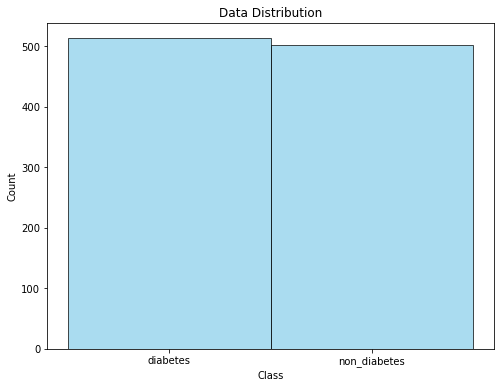

In [2]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Define constants
data_path = r"/home/lab5/Desktop/tongue_diabetes_new"
target_size = (224, 224)  # Define the target size for resizing

# Load and preprocess data
images = []
labels = []

# Loop through each class (Normal and Tuberculosis)
for class_name in ['diabetes', 'non_diabetes']:
    class_path = os.path.join(data_path, class_name)
    # Iterate through each image in the class
    for image_name in os.listdir(class_path):
        image_path = os.path.join(class_path, image_name)
        # Read the image in grayscale
        img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        # Resize the image to the target size
        img = cv2.resize(img, target_size)
        # Normalize the pixel values to the range [0, 1]
        img = img.astype(np.float32) / 255.0
        # Append the preprocessed image to the images list
        images.append(img)
        # Append the label (0 for Normal, 1 for Tuberculosis) to the labels list
        labels.append(0 if class_name == 'diabetes' else 1)

# Convert images and labels to NumPy arrays
images = np.array(images)
labels = np.array(labels)

# Print class proportions
print("Class Proportions:")
print("diabetes:", np.sum(labels == 0), "non_diabetes:", np.sum(labels == 1))

# Plot histogram for class distribution
plt.figure(figsize=(8, 6))
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution')
plt.show()


# Equal amount of data is taken

In [3]:
# Separate data for Normal and Tuberculosis classes
diabetes_images = images[labels == 0][:500]
non_diabetes_images = images[labels == 1][:500]
diabetes_labels = labels[labels == 0][:500]
non_diabetes_labels = labels[labels == 1][:500]

# Concatenate the data back together
balanced_images = np.concatenate([diabetes_images, non_diabetes_images])
balanced_labels = np.concatenate([diabetes_labels, non_diabetes_labels])

# Split the balanced dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(balanced_images, balanced_labels, test_size=0.2, random_state=42)

#print the balanced data
print("Balanced Images:",balanced_images.shape)
print("Balanced labels:",balanced_labels.shape)

#print the data seperately of each class
print("diabetes_images:",diabetes_images.shape)
print("non_diabetes_images:",non_diabetes_images.shape)


# Print the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Balanced Images: (1000, 224, 224)
Balanced labels: (1000,)
diabetes_images: (500, 224, 224)
non_diabetes_images: (500, 224, 224)
X_train shape: (800, 224, 224)
X_test shape: (200, 224, 224)
y_train shape: (800,)
y_test shape: (200,)


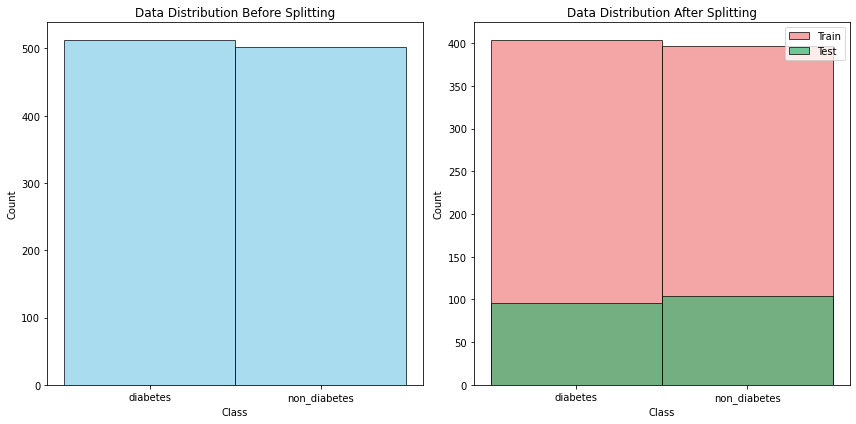

In [4]:
# Plot histogram for class distribution before splitting
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(labels, bins=2, color='skyblue', edgecolor='black', alpha=0.7)
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution Before Splitting')

# Plot histogram for class distribution after splitting
plt.subplot(1, 2, 2)
plt.hist(y_train, bins=2, color='lightcoral', edgecolor='black', alpha=0.7, label='Train')
plt.hist(y_test, bins=2, color='mediumseagreen', edgecolor='black', alpha=0.7, label='Test')
plt.xticks([0.25, 0.75], ['diabetes', 'non_diabetes'])
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Data Distribution After Splitting')
plt.legend()

plt.tight_layout()
plt.show()


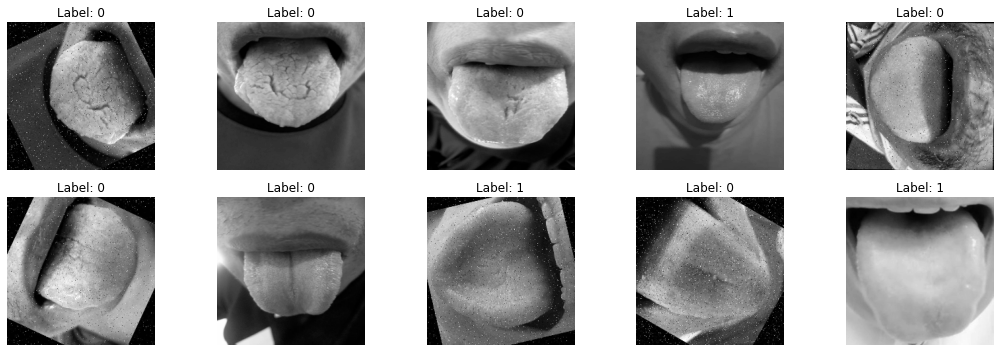

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import random

# Define the number of images to display
num_images_to_display = 10

# Select random indices for the images
indices = random.sample(range(len(balanced_images)), num_images_to_display)

# Create a figure to display the images
plt.figure(figsize=(15, 5))

# Loop over the selected indices and display the images
for i, idx in enumerate(indices):
    # Get the image and its corresponding label
    image = balanced_images[idx]
    label = balanced_labels[idx]

    # Add a subplot for the current image
    plt.subplot(2, 5, i % 5 + 1 + (i // 5) * 5)
    plt.imshow(image, cmap='gray')
    plt.title(f'Label: {label}')
    plt.axis('off')

# Adjust the layout of the subplots
plt.tight_layout()
plt.show()

In [6]:
images[0]

array([[0.6745098 , 0.68235296, 0.64705884, ..., 0.6666667 , 0.6627451 ,
        0.65882355],
       [0.67058825, 0.65882355, 0.64705884, ..., 0.67058825, 0.6627451 ,
        0.654902  ],
       [0.6666667 , 0.64705884, 0.6509804 , ..., 0.65882355, 0.64705884,
        0.6313726 ],
       ...,
       [0.49411765, 0.49411765, 0.49411765, ..., 0.7254902 , 0.7254902 ,
        0.72156864],
       [0.5921569 , 0.5921569 , 0.5921569 , ..., 0.69803923, 0.7137255 ,
        0.7254902 ],
       [0.7019608 , 0.7019608 , 0.7019608 , ..., 0.6784314 , 0.6901961 ,
        0.69803923]], dtype=float32)

Yes, you can add other layers or modify the architecture of the custom classification head in various ways, depending on the specific requirements of your task. Here are some common modifications:

1. **Dropout Layers**: Adding dropout layers can help prevent overfitting. Dropout layers randomly set a fraction of input units to 0 at each update during training, which helps prevent overfitting.

   Example:
   ```python
   x = Dropout(0.5)(x)  # Add dropout with a dropout rate of 0.5
   ```

2. **Batch Normalization**: Batch normalization normalizes the input layer by adjusting and scaling the activations. It can help with faster convergence and better generalization.

   Example:
   ```python
   x = BatchNormalization()(x)
   ```

3. **Additional Dense Layers**: Adding more dense layers can increase the model's capacity to learn complex patterns in the data. However, adding too many layers can lead to overfitting.

   Example:
   ```python
   x = Dense(256, activation='relu')(x)
   ```

4. **Different Activation Functions**: You can experiment with different activation functions in the dense layers. Common choices include `sigmoid`, `tanh`, and `relu`.

   Example:
   ```python
   x = Dense(512, activation='tanh')(x)
   ```

5. **Regularization**: You can add regularization to the dense layers to prevent overfitting. Common regularization techniques include L1 regularization, L2 regularization, and dropout.

   Example:
   ```python
   from tensorflow.keras import regularizers
   x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
   ```

These modifications can be added to the custom classification head after the `GlobalAveragePooling2D` layer to customize the model according to your needs. The choice of layers and their configurations should be based on the specific requirements of your task and the characteristics of your dataset.

# OverFitting  and UnderFitting Identification


Overfitting occurs when a machine learning model learns the training data too well, to the point that it negatively impacts its performance on unseen data. To identify overfitting, you can use several techniques:

1. **Validation Curve**: Plot the training and validation accuracies or losses against the number of epochs. If the training accuracy keeps increasing while the validation accuracy stagnates or starts decreasing, it indicates overfitting.

2. **Learning Curve**: Plot the training and validation accuracies or losses against the size of the training dataset. If the training and validation curves converge at a low error, the model is underfitting. If they diverge, the model may be overfitting.

3. **Validation Set Performance**: Evaluate the model on a separate validation set during training. If the validation accuracy starts to decrease while the training accuracy keeps increasing, the model is likely overfitting.

4. **Regularization Techniques**: Regularization techniques like L1 and L2 regularization, dropout, and early stopping can help prevent overfitting. If you observe a significant improvement in performance with these techniques, it indicates that overfitting was present.

5. **Cross-Validation**: Use k-fold cross-validation to assess the model's performance on different subsets of the data. If the model performs significantly better on the training data compared to the validation data, it suggests overfitting.

6. **Model Complexity**: If you have control over the model architecture, reducing the complexity (e.g., number of layers, number of units per layer) can help prevent overfitting.

7. **Data Augmentation**: If applicable, augmenting the training data can help improve the model's generalization performance by exposing it to more variations in the data.

By monitoring these indicators, you can identify and mitigate overfitting in your machine learning models.

# MobileNetV2+Dense Layers

2024-03-24 14:57:04.466642: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-24 14:57:04.466854: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 14:57:04.468481: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-24 14:57:04.486154: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-24 14:57:04.846020: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warnin

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 422ms/step - accuracy: 0.5669 - auc: 0.5832 - auc_1: 0.5418 - false_negatives: 85.2692 - false_positives: 88.2308 - loss: 11.5997 - precision: 0.5468 - recall: 0.5600 - true_negatives: 134.1923 - true_positives: 123.0769 - val_accuracy: 0.6450 - val_auc: 0.7812 - val_auc_1: 0.8538 - val_false_negatives: 71.0000 - val_false_positives: 0.0000e+00 - val_loss: 2.8182 - val_precision: 1.0000 - val_recall: 0.3173 - val_true_negatives: 96.0000 - val_true_positives: 33.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.8544 - auc: 0.9105 - auc_1: 0.8766 - false_negatives: 28.0000 - false_positives: 30.7308 - loss: 0.8685 - precision: 0.8575 - recall: 0.8429 - true_negatives: 191.6923 - true_positives: 180.3462 - val_accuracy: 0.7950 - val_auc: 0.8760 - val_auc_1: 0.9204 - val_false_negatives: 41.0000 - val_false_positives: 0.0000e+00 - val_loss: 1.1622 - val_precision: 1.0000 - val_r

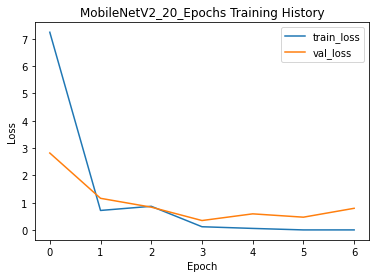

In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with MobileNetV2 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+DENSE20',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 426ms/step - accuracy: 0.4983 - auc_2: 0.5256 - auc_3: 0.5004 - false_negatives_1: 101.3462 - false_positives_1: 98.2692 - loss: 13.9076 - precision_1: 0.4759 - recall_1: 0.4597 - true_negatives_1: 124.1538 - true_positives_1: 107.0000 - val_accuracy: 0.8050 - val_auc_2: 0.8808 - val_auc_3: 0.8522 - val_false_negatives_1: 14.0000 - val_false_positives_1: 25.0000 - val_loss: 0.8583 - val_precision_1: 0.7826 - val_recall_1: 0.8654 - val_true_negatives_1: 71.0000 - val_true_positives_1: 90.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 389ms/step - accuracy: 0.8658 - auc_2: 0.9178 - auc_3: 0.8765 - false_negatives_1: 25.6154 - false_positives_1: 32.2692 - loss: 0.7692 - precision_1: 0.8479 - recall_1: 0.8796 - true_negatives_1: 190.1538 - true_positives_1: 182.7308 - val_accuracy: 0.5400 - val_auc_2: 0.6106 - val_auc_3: 0.6963 - val_false_negatives_1: 92.0000 - val_false_positives_1: 0.0000e+00 - val_loss: 6.4918 - val_precision_1: 1.0000 - val_re

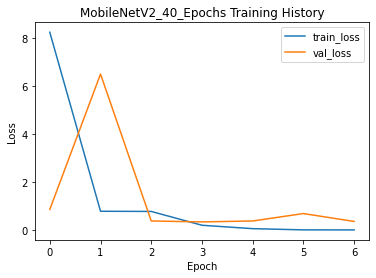

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with MobileNetV2 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 419ms/step - accuracy: 0.6869 - auc_4: 0.7160 - auc_5: 0.6675 - false_negatives_2: 56.2692 - false_positives_2: 67.1923 - loss: 5.0176 - precision_2: 0.6617 - recall_2: 0.7134 - true_negatives_2: 155.2308 - true_positives_2: 152.0769 - val_accuracy: 0.8600 - val_auc_4: 0.9224 - val_auc_5: 0.9132 - val_false_negatives_2: 11.0000 - val_false_positives_2: 17.0000 - val_loss: 0.5503 - val_precision_2: 0.8455 - val_recall_2: 0.8942 - val_true_negatives_2: 79.0000 - val_true_positives_2: 93.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.8794 - auc_4: 0.9207 - auc_5: 0.9099 - false_negatives_2: 28.6538 - false_positives_2: 25.5385 - loss: 0.8659 - precision_2: 0.8872 - recall_2: 0.8571 - true_negatives_2: 196.8846 - true_positives_2: 179.6923 - val_accuracy: 0.6950 - val_auc_4: 0.7798 - val_auc_5: 0.8512 - val_false_negatives_2: 60.0000 - val_false_positives_2: 1.0000 - val_loss: 2.9030 - val_precision_2: 0.9778 - val_recall_2

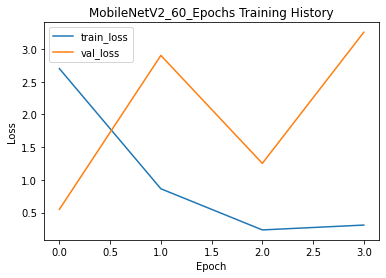

In [9]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with MobileNetV2 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 414ms/step - accuracy: 0.5840 - auc_6: 0.5864 - auc_7: 0.5505 - false_negatives_3: 81.5000 - false_positives_3: 87.1154 - loss: 10.8893 - precision_3: 0.5697 - recall_3: 0.5779 - true_negatives_3: 135.3077 - true_positives_3: 126.8462 - val_accuracy: 0.7100 - val_auc_6: 0.8259 - val_auc_7: 0.8782 - val_false_negatives_3: 56.0000 - val_false_positives_3: 2.0000 - val_loss: 1.6788 - val_precision_3: 0.9600 - val_recall_3: 0.4615 - val_true_negatives_3: 94.0000 - val_true_positives_3: 48.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 385ms/step - accuracy: 0.8724 - auc_6: 0.9170 - auc_7: 0.8968 - false_negatives_3: 26.8462 - false_positives_3: 24.3462 - loss: 0.7079 - precision_3: 0.8819 - recall_3: 0.8498 - true_negatives_3: 198.0769 - true_positives_3: 181.5000 - val_accuracy: 0.7450 - val_auc_6: 0.8785 - val_auc_7: 0.9196 - val_false_negatives_3: 51.0000 - val_false_positives_3: 0.0000e+00 - val_loss: 1.3662 - val_precision_3: 1.0000 - val_reca

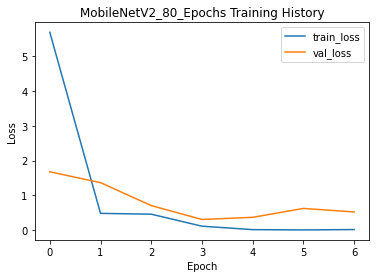

In [10]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with MobileNetV2 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 426ms/step - accuracy: 0.5256 - auc_8: 0.5663 - auc_9: 0.5275 - false_negatives_4: 93.6538 - false_positives_4: 96.8846 - loss: 16.3600 - precision_4: 0.4858 - recall_4: 0.4954 - true_negatives_4: 125.5385 - true_positives_4: 114.6923 - val_accuracy: 0.5350 - val_auc_8: 0.6694 - val_auc_9: 0.7573 - val_false_negatives_4: 93.0000 - val_false_positives_4: 0.0000e+00 - val_loss: 4.0304 - val_precision_4: 1.0000 - val_recall_4: 0.1058 - val_true_negatives_4: 96.0000 - val_true_positives_4: 11.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 383ms/step - accuracy: 0.8100 - auc_8: 0.8773 - auc_9: 0.8654 - false_negatives_4: 42.7692 - false_positives_4: 28.4615 - loss: 1.2359 - precision_4: 0.8636 - recall_4: 0.7283 - true_negatives_4: 193.9615 - true_positives_4: 165.5769 - val_accuracy: 0.8250 - val_auc_8: 0.9217 - val_auc_9: 0.9164 - val_false_negatives_4: 10.0000 - val_false_positives_4: 25.0000 - val_loss: 0.4647 - val_precision_4: 0.7899 - val_r

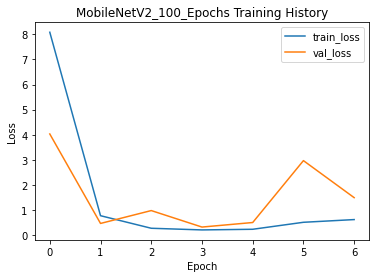

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, balanced_accuracy_score, cohen_kappa_score, matthews_corrcoef
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Create new model with MobileNetV2 base and additional layers
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_100_Epochs Training History")
plt.show()


In [12]:
num_training_records = X_train_resized.shape[0]
print("Number of training records:", num_training_records)


Number of training records: 800


# MobileNetV2+Dropout+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 411ms/step - accuracy: 0.6050 - auc_10: 0.6186 - auc_11: 0.5679 - false_negatives_5: 74.8077 - false_positives_5: 81.5385 - loss: 17.2861 - precision_5: 0.5861 - recall_5: 0.6126 - true_negatives_5: 140.8846 - true_positives_5: 133.5385 - val_accuracy: 0.7000 - val_auc_10: 0.7509 - val_auc_11: 0.8200 - val_false_negatives_5: 59.0000 - val_false_positives_5: 1.0000 - val_loss: 6.0821 - val_precision_5: 0.9783 - val_recall_5: 0.4327 - val_true_negatives_5: 95.0000 - val_true_positives_5: 45.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 382ms/step - accuracy: 0.8563 - auc_10: 0.8625 - auc_11: 0.8556 - false_negatives_5: 39.0000 - false_positives_5: 21.6923 - loss: 3.2865 - precision_5: 0.9079 - recall_5: 0.7815 - true_negatives_5: 200.7308 - true_positives_5: 169.3462 - val_accuracy: 0.8450 - val_auc_10: 0.8918 - val_auc_11: 0.8554 - val_false_negatives_5: 9.0000 - val_false_positives_5: 22.0000 - val_loss: 1.0861 - val_precision_5: 0.8120 - val_

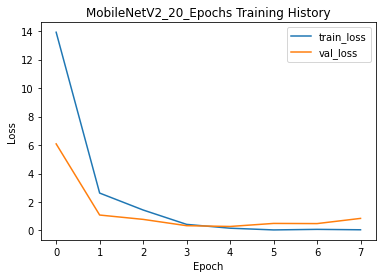

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time
# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'MobileNetV2+DROPOUT+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DROPOUT20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 416ms/step - accuracy: 0.5761 - auc_12: 0.5824 - auc_13: 0.5365 - false_negatives_6: 85.7692 - false_positives_6: 84.3077 - loss: 19.9020 - precision_6: 0.5576 - recall_6: 0.5490 - true_negatives_6: 138.1154 - true_positives_6: 122.5769 - val_accuracy: 0.7150 - val_auc_12: 0.7787 - val_auc_13: 0.8409 - val_false_negatives_6: 55.0000 - val_false_positives_6: 2.0000 - val_loss: 5.3614 - val_precision_6: 0.9608 - val_recall_6: 0.4712 - val_true_negatives_6: 94.0000 - val_true_positives_6: 49.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 385ms/step - accuracy: 0.8345 - auc_12: 0.8504 - auc_13: 0.8382 - false_negatives_6: 43.8462 - false_positives_6: 25.9615 - loss: 2.7442 - precision_6: 0.8879 - recall_6: 0.7563 - true_negatives_6: 196.4615 - true_positives_6: 164.5000 - val_accuracy: 0.8550 - val_auc_12: 0.8998 - val_auc_13: 0.8883 - val_false_negatives_6: 14.0000 - val_false_positives_6: 15.0000 - val_loss: 0.7999 - val_precision_6: 0.8571 - val

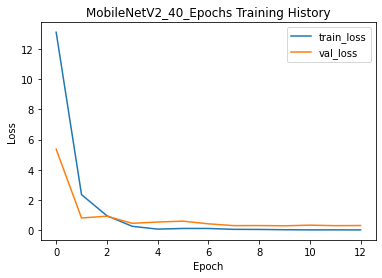

In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time
# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'MobileNetV2+DROPOUT+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DROPOUT40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 408ms/step - accuracy: 0.6458 - auc_14: 0.6519 - auc_15: 0.6054 - false_negatives_7: 67.9615 - false_positives_7: 71.9231 - loss: 10.3022 - precision_7: 0.6282 - recall_7: 0.6491 - true_negatives_7: 150.5000 - true_positives_7: 140.3846 - val_accuracy: 0.8100 - val_auc_14: 0.8538 - val_auc_15: 0.8756 - val_false_negatives_7: 32.0000 - val_false_positives_7: 6.0000 - val_loss: 2.4411 - val_precision_7: 0.9231 - val_recall_7: 0.6923 - val_true_negatives_7: 90.0000 - val_true_positives_7: 72.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 378ms/step - accuracy: 0.8696 - auc_14: 0.9047 - auc_15: 0.8713 - false_negatives_7: 27.0000 - false_positives_7: 27.5000 - loss: 2.0126 - precision_7: 0.8681 - recall_7: 0.8607 - true_negatives_7: 194.9231 - true_positives_7: 181.3462 - val_accuracy: 0.7400 - val_auc_14: 0.7885 - val_auc_15: 0.8596 - val_false_negatives_7: 52.0000 - val_false_positives_7: 0.0000e+00 - val_loss: 3.7081 - val_precision_7: 1.0000 - v

25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 1.0000 - auc_14: 1.0000 - auc_15: 1.0000 - false_negatives_7: 0.0000e+00 - false_positives_7: 0.0000e+00 - loss: 0.0024 - precision_7: 1.0000 - recall_7: 1.0000 - true_negatives_7: 222.4231 - true_positives_7: 208.3462 - val_accuracy: 0.9100 - val_auc_14: 0.9765 - val_auc_15: 0.9729 - val_false_negatives_7: 11.0000 - val_false_positives_7: 7.0000 - val_loss: 0.2220 - val_precision_7: 0.9300 - val_recall_7: 0.8942 - val_true_negatives_7: 89.0000 - val_true_positives_7: 93.0000
Epoch 16/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 1.0000 - auc_14: 1.0000 - auc_15: 1.0000 - false_negatives_7: 0.0000e+00 - false_positives_7: 0.0000e+00 - loss: 8.6503e-04 - precision_7: 1.0000 - recall_7: 1.0000 - true_negatives_7: 222.4231 - true_positives_7: 208.3462 - val_accuracy: 0.9300 - val_auc_14: 0.9780 - val_auc_15: 0.9741 - val_false_negatives_7: 8.0000 - val_false_positives_7: 6.0000 - val_loss: 0.2161 - val_precision_7: 0.9412 - 

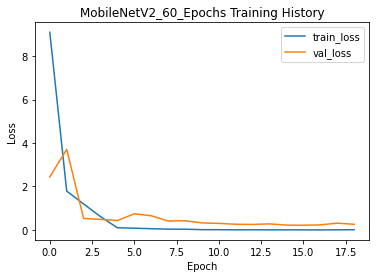

In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time
# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'MobileNetV2+DROPOUT+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DROPOUT60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 412ms/step - accuracy: 0.5824 - auc_16: 0.5984 - auc_17: 0.5559 - false_negatives_8: 83.0769 - false_positives_8: 80.4231 - loss: 14.6641 - precision_8: 0.5655 - recall_8: 0.5592 - true_negatives_8: 142.0000 - true_positives_8: 125.2692 - val_accuracy: 0.8400 - val_auc_16: 0.8626 - val_auc_17: 0.8617 - val_false_negatives_8: 22.0000 - val_false_positives_8: 10.0000 - val_loss: 1.1379 - val_precision_8: 0.8913 - val_recall_8: 0.7885 - val_true_negatives_8: 86.0000 - val_true_positives_8: 82.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 381ms/step - accuracy: 0.8718 - auc_16: 0.8982 - auc_17: 0.8713 - false_negatives_8: 29.9615 - false_positives_8: 30.1538 - loss: 1.2813 - precision_8: 0.8715 - recall_8: 0.8595 - true_negatives_8: 192.2692 - true_positives_8: 178.3846 - val_accuracy: 0.8400 - val_auc_16: 0.9319 - val_auc_17: 0.9420 - val_false_negatives_8: 19.0000 - val_false_positives_8: 13.0000 - val_loss: 0.5394 - val_precision_8: 0.8673 - va

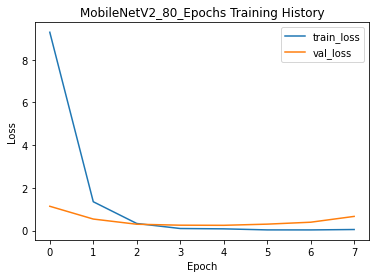

In [16]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time
# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'MobileNetV2+DROPOUT+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DROPOUT80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 409ms/step - accuracy: 0.6288 - auc_18: 0.6268 - auc_19: 0.5779 - false_negatives_9: 74.6154 - false_positives_9: 72.1154 - loss: 14.3136 - precision_9: 0.6147 - recall_9: 0.6093 - true_negatives_9: 150.3077 - true_positives_9: 133.7308 - val_accuracy: 0.8550 - val_auc_18: 0.9079 - val_auc_19: 0.9288 - val_false_negatives_9: 24.0000 - val_false_positives_9: 5.0000 - val_loss: 0.9305 - val_precision_9: 0.9412 - val_recall_9: 0.7692 - val_true_negatives_9: 91.0000 - val_true_positives_9: 80.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 380ms/step - accuracy: 0.8668 - auc_18: 0.9036 - auc_19: 0.8866 - false_negatives_9: 32.8846 - false_positives_9: 27.8462 - loss: 1.1204 - precision_9: 0.8802 - recall_9: 0.8376 - true_negatives_9: 194.5769 - true_positives_9: 175.4615 - val_accuracy: 0.8900 - val_auc_18: 0.9392 - val_auc_19: 0.9488 - val_false_negatives_9: 18.0000 - val_false_positives_9: 4.0000 - val_loss: 0.4593 - val_precision_9: 0.9556 - val

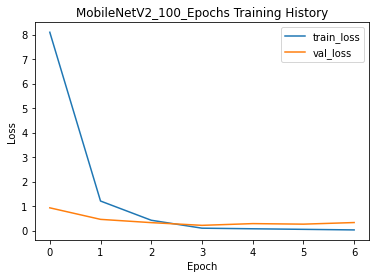

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)  # Repeat grayscale channel to 3 channels

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture
model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),  # Dropout layer with dropout rate of 0.5
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time
# Compile the model with Adam optimizer and additional metrics
model_details = {
    'Model': 'MobileNetV2+DROPOUT+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+DROPOUT100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_100_Epochs Training History")
plt.show()


# MobileNetV2+GAP2D+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 253ms/step - accuracy: 0.6385 - auc_20: 0.6867 - auc_21: 0.6815 - false_negatives_10: 70.4615 - false_positives_10: 72.1154 - loss: 0.7983 - precision_10: 0.6211 - recall_10: 0.6346 - true_negatives_10: 150.3077 - true_positives_10: 137.8846 - val_accuracy: 0.8400 - val_auc_20: 0.9224 - val_auc_21: 0.9292 - val_false_negatives_10: 16.0000 - val_false_positives_10: 16.0000 - val_loss: 0.3509 - val_precision_10: 0.8462 - val_recall_10: 0.8462 - val_true_negatives_10: 80.0000 - val_true_positives_10: 88.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 224ms/step - accuracy: 0.8512 - auc_20: 0.9220 - auc_21: 0.9026 - false_negatives_10: 33.3462 - false_positives_10: 34.5385 - loss: 0.3569 - precision_10: 0.8467 - recall_10: 0.8416 - true_negatives_10: 187.8846 - true_positives_10: 175.0000 - val_accuracy: 0.7850 - val_auc_20: 0.9110 - val_auc_21: 0.9236 - val_false_negatives_10: 40.0000 - val_false_positives_10: 3.0000 - val_loss: 0.4581 - val_precisio

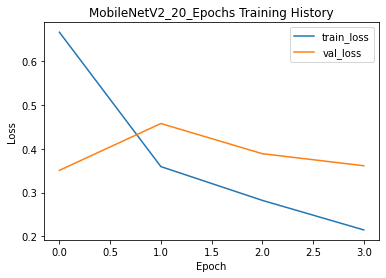

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with MobileNetV2
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+GLOBALAVGPOOL+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GLOBALAVGPOOL+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 265ms/step - accuracy: 0.5902 - auc_22: 0.6182 - auc_23: 0.5890 - false_negatives_11: 83.2308 - false_positives_11: 81.8846 - loss: 1.0743 - precision_11: 0.5774 - recall_11: 0.5688 - true_negatives_11: 140.5385 - true_positives_11: 125.1154 - val_accuracy: 0.7250 - val_auc_22: 0.8620 - val_auc_23: 0.8850 - val_false_negatives_11: 46.0000 - val_false_positives_11: 9.0000 - val_loss: 0.5072 - val_precision_11: 0.8657 - val_recall_11: 0.5577 - val_true_negatives_11: 87.0000 - val_true_positives_11: 58.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 237ms/step - accuracy: 0.7740 - auc_22: 0.8713 - auc_23: 0.8727 - false_negatives_11: 66.2692 - false_positives_11: 31.9615 - loss: 0.4959 - precision_11: 0.8560 - recall_11: 0.6459 - true_negatives_11: 190.4615 - true_positives_11: 142.0769 - val_accuracy: 0.7950 - val_auc_22: 0.9168 - val_auc_23: 0.9264 - val_false_negatives_11: 11.0000 - val_false_positives_11: 30.0000 - val_loss: 0.3870 - val_precisio

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 230ms/step - accuracy: 0.9905 - auc_22: 0.9995 - auc_23: 0.9994 - false_negatives_11: 2.9615 - false_positives_11: 1.3462 - loss: 0.0442 - precision_11: 0.9955 - recall_11: 0.9845 - true_negatives_11: 221.0769 - true_positives_11: 205.3846 - val_accuracy: 0.9000 - val_auc_22: 0.9680 - val_auc_23: 0.9713 - val_false_negatives_11: 15.0000 - val_false_positives_11: 5.0000 - val_loss: 0.2456 - val_precision_11: 0.9468 - val_recall_11: 0.8558 - val_true_negatives_11: 91.0000 - val_true_positives_11: 89.0000
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 12.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.9028 - auc_22: 0.9625 - auc_23: 0.9666 - false_negatives_11: 9.1250 - false_positives_11: 4.2500 - loss: 0.2558 - precision_11: 0.9378 - recall_11: 0.8776 - true_negatives_11: 58.7500 - true_positives_11: 61.8750
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step
Model Details:
Model: MobileNetV2+GLOBALAVGPOOL+DENSE
Epochs: 40
Test Ac

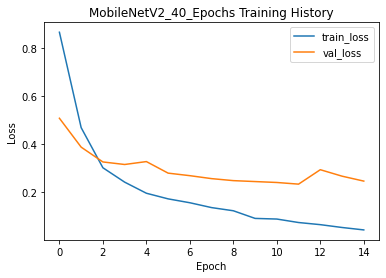

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with MobileNetV2
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+GLOBALAVGPOOL+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GLOBALAVGPOOL+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 259ms/step - accuracy: 0.5985 - auc_24: 0.6006 - auc_25: 0.5543 - false_negatives_12: 82.8077 - false_positives_12: 74.0385 - loss: 1.0630 - precision_12: 0.5915 - recall_12: 0.5532 - true_negatives_12: 148.3846 - true_positives_12: 125.5385 - val_accuracy: 0.7050 - val_auc_24: 0.8789 - val_auc_25: 0.8875 - val_false_negatives_12: 54.0000 - val_false_positives_12: 5.0000 - val_loss: 0.5320 - val_precision_12: 0.9091 - val_recall_12: 0.4808 - val_true_negatives_12: 91.0000 - val_true_positives_12: 50.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.8010 - auc_24: 0.9008 - auc_25: 0.8907 - false_negatives_12: 52.4231 - false_positives_12: 33.1923 - loss: 0.4343 - precision_12: 0.8518 - recall_12: 0.7155 - true_negatives_12: 189.2308 - true_positives_12: 155.9231 - val_accuracy: 0.8100 - val_auc_24: 0.9125 - val_auc_25: 0.9155 - val_false_negatives_12: 21.0000 - val_false_positives_12: 17.0000 - val_loss: 0.3617 - val_precisio

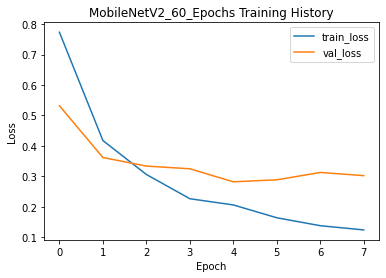

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with MobileNetV2
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+GLOBALAVGPOOL+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GLOBALAVGPOOL+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.5988 - auc_26: 0.6341 - auc_27: 0.6097 - false_negatives_13: 80.6154 - false_positives_13: 74.3462 - loss: 0.8926 - precision_13: 0.5862 - recall_13: 0.5585 - true_negatives_13: 148.0769 - true_positives_13: 127.7308 - val_accuracy: 0.6950 - val_auc_26: 0.8842 - val_auc_27: 0.8979 - val_false_negatives_13: 58.0000 - val_false_positives_13: 3.0000 - val_loss: 0.5856 - val_precision_13: 0.9388 - val_recall_13: 0.4423 - val_true_negatives_13: 93.0000 - val_true_positives_13: 46.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 231ms/step - accuracy: 0.8169 - auc_26: 0.9027 - auc_27: 0.8970 - false_negatives_13: 45.6154 - false_positives_13: 30.5769 - loss: 0.4270 - precision_13: 0.8684 - recall_13: 0.7406 - true_negatives_13: 191.8462 - true_positives_13: 162.7308 - val_accuracy: 0.7600 - val_auc_26: 0.9142 - val_auc_27: 0.9188 - val_false_negatives_13: 43.0000 - val_false_positives_13: 5.0000 - val_loss: 0.4540 - val_precision

25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 229ms/step - accuracy: 0.9944 - auc_26: 0.9993 - auc_27: 0.9992 - false_negatives_13: 2.0385 - false_positives_13: 0.1923 - loss: 0.0451 - precision_13: 0.9995 - recall_13: 0.9886 - true_negatives_13: 222.2308 - true_positives_13: 206.3077 - val_accuracy: 0.8800 - val_auc_26: 0.9613 - val_auc_27: 0.9581 - val_false_negatives_13: 17.0000 - val_false_positives_13: 7.0000 - val_loss: 0.2513 - val_precision_13: 0.9255 - val_recall_13: 0.8365 - val_true_negatives_13: 89.0000 - val_true_positives_13: 87.0000
Epoch 16/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 232ms/step - accuracy: 0.9946 - auc_26: 0.9999 - auc_27: 0.9999 - false_negatives_13: 1.6923 - false_positives_13: 0.7692 - loss: 0.0397 - precision_13: 0.9977 - recall_13: 0.9908 - true_negatives_13: 221.6538 - true_positives_13: 206.6538 - val_accuracy: 0.8950 - val_auc_26: 0.9629 - val_auc_27: 0.9589 - val_false_negatives_13: 12.0000 - val_false_positives_13: 9.0000 - val_loss: 0.2408 - val_precision_13: 0.9109 - 

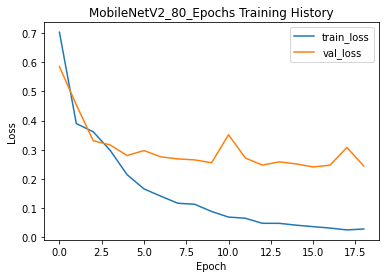

In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with MobileNetV2
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+GLOBALAVGPOOL+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GLOBALAVGPOOL+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 272ms/step - accuracy: 0.6618 - auc_28: 0.7185 - auc_29: 0.7179 - false_negatives_14: 71.0385 - false_positives_14: 67.0385 - loss: 0.7087 - precision_14: 0.6465 - recall_14: 0.6426 - true_negatives_14: 155.3846 - true_positives_14: 137.3077 - val_accuracy: 0.7350 - val_auc_28: 0.9208 - val_auc_29: 0.9262 - val_false_negatives_14: 50.0000 - val_false_positives_14: 3.0000 - val_loss: 0.4684 - val_precision_14: 0.9474 - val_recall_14: 0.5192 - val_true_negatives_14: 93.0000 - val_true_positives_14: 54.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.8402 - auc_28: 0.9156 - auc_29: 0.9134 - false_negatives_14: 35.4231 - false_positives_14: 30.6923 - loss: 0.3813 - precision_14: 0.8623 - recall_14: 0.7992 - true_negatives_14: 191.7308 - true_positives_14: 172.9231 - val_accuracy: 0.8000 - val_auc_28: 0.9311 - val_auc_29: 0.9410 - val_false_negatives_14: 37.0000 - val_false_positives_14: 3.0000 - val_loss: 0.4010 - val_precisi

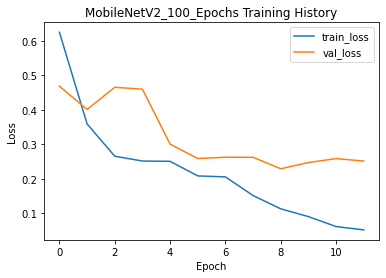

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Set seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define new model architecture with MobileNetV2
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),  # Global average pooling layer
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer and additional metrics
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+GLOBALAVGPOOL+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GLOBALAVGPOOL+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2_100_Epochs Training History")
plt.show()


# MobileNetV2+Conv2D+GAP2D+Dropout+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 263ms/step - accuracy: 0.4771 - auc_30: 0.4920 - auc_31: 0.4656 - false_negatives_15: 118.9231 - false_positives_15: 104.3462 - loss: 1.2421 - precision_15: 0.4737 - recall_15: 0.4341 - true_negatives_15: 118.0769 - true_positives_15: 89.4231 - val_accuracy: 0.6500 - val_auc_30: 0.7174 - val_auc_31: 0.7079 - val_false_negatives_15: 18.0000 - val_false_positives_15: 52.0000 - val_loss: 0.6187 - val_precision_15: 0.6232 - val_recall_15: 0.8269 - val_true_negatives_15: 44.0000 - val_true_positives_15: 86.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 236ms/step - accuracy: 0.6126 - auc_30: 0.6666 - auc_31: 0.6339 - false_negatives_15: 121.7308 - false_positives_15: 42.1923 - loss: 0.6367 - precision_15: 0.6588 - recall_15: 0.4140 - true_negatives_15: 180.2308 - true_positives_15: 86.6154 - val_accuracy: 0.7400 - val_auc_30: 0.8209 - val_auc_31: 0.8204 - val_false_negatives_15: 13.0000 - val_false_positives_15: 39.0000 - val_loss: 0.5694 - val_precis

Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 235ms/step - accuracy: 0.8893 - auc_30: 0.9539 - auc_31: 0.9490 - false_negatives_15: 6.3462 - false_positives_15: 37.5000 - loss: 0.2375 - precision_15: 0.8285 - recall_15: 0.9739 - true_negatives_15: 184.9231 - true_positives_15: 202.0000 - val_accuracy: 0.9150 - val_auc_30: 0.9569 - val_auc_31: 0.9619 - val_false_negatives_15: 12.0000 - val_false_positives_15: 5.0000 - val_loss: 0.2706 - val_precision_15: 0.9485 - val_recall_15: 0.8846 - val_true_negatives_15: 91.0000 - val_true_positives_15: 92.0000
Epoch 16/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.9081 - auc_30: 0.9632 - auc_31: 0.9551 - false_negatives_15: 7.7308 - false_positives_15: 30.0000 - loss: 0.2109 - precision_15: 0.8650 - recall_15: 0.9577 - true_negatives_15: 192.4231 - true_positives_15: 200.6154 - val_accuracy: 0.8800 - val_auc_30: 0.9564 - val_auc_31: 0.9601 - val_false_negatives_15: 18.0000 - val_false_positives_15: 6.0000 - val_loss: 0.3029 - val_precision

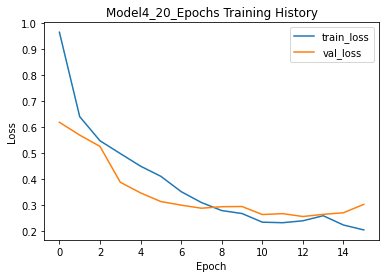

In [23]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with MobileNetV2 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNet_Model4(20)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_20_Epochs Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 262ms/step - accuracy: 0.5566 - auc_32: 0.5814 - auc_33: 0.5315 - false_negatives_16: 115.8077 - false_positives_16: 67.7308 - loss: 0.9170 - precision_16: 0.5653 - recall_16: 0.4252 - true_negatives_16: 154.6923 - true_positives_16: 92.5385 - val_accuracy: 0.8050 - val_auc_32: 0.8804 - val_auc_33: 0.8729 - val_false_negatives_16: 19.0000 - val_false_positives_16: 20.0000 - val_loss: 0.5182 - val_precision_16: 0.8095 - val_recall_16: 0.8173 - val_true_negatives_16: 76.0000 - val_true_positives_16: 85.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.7060 - auc_32: 0.7944 - auc_33: 0.7578 - false_negatives_16: 73.0385 - false_positives_16: 49.8462 - loss: 0.5478 - precision_16: 0.7110 - recall_16: 0.6546 - true_negatives_16: 172.5769 - true_positives_16: 135.3077 - val_accuracy: 0.7900 - val_auc_32: 0.9172 - val_auc_33: 0.9237 - val_false_negatives_16: 37.0000 - val_false_positives_16: 5.0000 - val_loss: 0.4597 - val_precisio

Epoch 15/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 247ms/step - accuracy: 0.9353 - auc_32: 0.9787 - auc_33: 0.9742 - false_negatives_16: 11.5385 - false_positives_16: 17.8846 - loss: 0.1777 - precision_16: 0.9182 - recall_16: 0.9502 - true_negatives_16: 204.5385 - true_positives_16: 196.8077 - val_accuracy: 0.8900 - val_auc_32: 0.9564 - val_auc_33: 0.9596 - val_false_negatives_16: 8.0000 - val_false_positives_16: 14.0000 - val_loss: 0.2622 - val_precision_16: 0.8727 - val_recall_16: 0.9231 - val_true_negatives_16: 82.0000 - val_true_positives_16: 96.0000
Epoch 16/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 242ms/step - accuracy: 0.9105 - auc_32: 0.9703 - auc_33: 0.9680 - false_negatives_16: 8.4615 - false_positives_16: 28.9615 - loss: 0.2098 - precision_16: 0.8654 - recall_16: 0.9649 - true_negatives_16: 193.4615 - true_positives_16: 199.8846 - val_accuracy: 0.8750 - val_auc_32: 0.9506 - val_auc_33: 0.9535 - val_false_negatives_16: 7.0000 - val_false_positives_16: 18.0000 - val_loss: 0.2994 - val_precisio

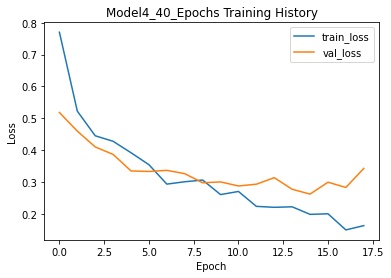

In [24]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with MobileNetV2 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNet_Model4(40)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_40_Epochs Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 256ms/step - accuracy: 0.5936 - auc_34: 0.5879 - auc_35: 0.5302 - false_negatives_17: 74.9231 - false_positives_17: 98.2308 - loss: 0.9514 - precision_17: 0.5657 - recall_17: 0.6381 - true_negatives_17: 124.1923 - true_positives_17: 133.4231 - val_accuracy: 0.7250 - val_auc_34: 0.8680 - val_auc_35: 0.8612 - val_false_negatives_17: 49.0000 - val_false_positives_17: 6.0000 - val_loss: 0.5266 - val_precision_17: 0.9016 - val_recall_17: 0.5288 - val_true_negatives_17: 90.0000 - val_true_positives_17: 55.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 228ms/step - accuracy: 0.7293 - auc_34: 0.8061 - auc_35: 0.8002 - false_negatives_17: 64.5000 - false_positives_17: 47.8077 - loss: 0.5247 - precision_17: 0.7419 - recall_17: 0.6735 - true_negatives_17: 174.6154 - true_positives_17: 143.8462 - val_accuracy: 0.7250 - val_auc_34: 0.9129 - val_auc_35: 0.9189 - val_false_negatives_17: 52.0000 - val_false_positives_17: 3.0000 - val_loss: 0.4660 - val_precision

Epoch 14: early stopping
Restoring model weights from the end of the best epoch: 11.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.8981 - auc_34: 0.9580 - auc_35: 0.9635 - false_negatives_17: 8.6250 - false_positives_17: 5.8750 - loss: 0.2689 - precision_17: 0.9225 - recall_17: 0.8837 - true_negatives_17: 57.1250 - true_positives_17: 62.3750
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step
Model Details:
Model: MobileNetV2+Conv2D+GLOBALAVGPOOL+DENSE
Epochs: 20
Test Accuracy: 0.8899999856948853
Test Loss: 0.246622696518898
Validation Accuracy: 0.8899999856948853
Validation Loss: 0.2905256450176239
Precision: 0.9019607843137255
Recall: 0.8846153846153846
AUC-ROC: 0.890224358974359
AUC-PR: 0.923288084464555
True Negatives: 0.9019607901573181
False Positives: 0.8846153616905212
False Negatives: 86.0
True Positives: 92.0
Error Rate: 0.4996
F1 Score: 0.8932038834951457
Cohen's Kappa: 0.7798238590872698
Matthews Correlation Coefficient: 0.7799801206576289
Balanced Accuracy: 0.890224358974359
Tim

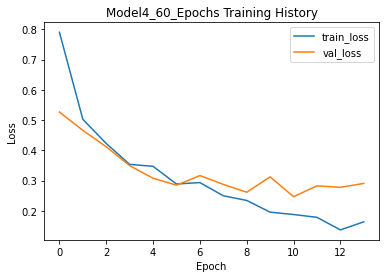

In [25]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with MobileNetV2 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNet_Model4(60)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_60_Epochs Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 255ms/step - accuracy: 0.6153 - auc_36: 0.6498 - auc_37: 0.6224 - false_negatives_18: 78.9615 - false_positives_18: 80.5769 - loss: 0.7119 - precision_18: 0.5931 - recall_18: 0.6193 - true_negatives_18: 141.8462 - true_positives_18: 129.3846 - val_accuracy: 0.6800 - val_auc_36: 0.8940 - val_auc_37: 0.9009 - val_false_negatives_18: 63.0000 - val_false_positives_18: 1.0000 - val_loss: 0.5311 - val_precision_18: 0.9762 - val_recall_18: 0.3942 - val_true_negatives_18: 95.0000 - val_true_positives_18: 41.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 227ms/step - accuracy: 0.7550 - auc_36: 0.8600 - auc_37: 0.8539 - false_negatives_18: 59.3846 - false_positives_18: 41.8077 - loss: 0.4637 - precision_18: 0.7815 - recall_18: 0.6822 - true_negatives_18: 180.6154 - true_positives_18: 148.9615 - val_accuracy: 0.6750 - val_auc_36: 0.9150 - val_auc_37: 0.9199 - val_false_negatives_18: 63.0000 - val_false_positives_18: 2.0000 - val_loss: 0.5083 - val_precision

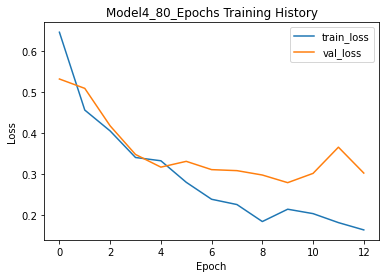

In [26]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with MobileNetV2 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNet_Model4(80)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_80_Epochs Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 260ms/step - accuracy: 0.5018 - auc_38: 0.5357 - auc_39: 0.4956 - false_negatives_19: 108.4231 - false_positives_19: 93.6923 - loss: 0.8655 - precision_19: 0.4677 - recall_19: 0.4206 - true_negatives_19: 128.7308 - true_positives_19: 99.9231 - val_accuracy: 0.8000 - val_auc_38: 0.8819 - val_auc_39: 0.8845 - val_false_negatives_19: 21.0000 - val_false_positives_19: 19.0000 - val_loss: 0.4979 - val_precision_19: 0.8137 - val_recall_19: 0.7981 - val_true_negatives_19: 77.0000 - val_true_positives_19: 83.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 238ms/step - accuracy: 0.7725 - auc_38: 0.8329 - auc_39: 0.8036 - false_negatives_19: 45.6923 - false_positives_19: 50.3077 - loss: 0.5048 - precision_19: 0.7606 - recall_19: 0.7671 - true_negatives_19: 172.1154 - true_positives_19: 162.6538 - val_accuracy: 0.7950 - val_auc_38: 0.9087 - val_auc_39: 0.9109 - val_false_negatives_19: 34.0000 - val_false_positives_19: 7.0000 - val_loss: 0.4225 - val_precis

Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 233ms/step - accuracy: 0.9157 - auc_38: 0.9799 - auc_39: 0.9780 - false_negatives_19: 15.5769 - false_positives_19: 19.4231 - loss: 0.1807 - precision_19: 0.8986 - recall_19: 0.9295 - true_negatives_19: 203.0000 - true_positives_19: 192.7692 - val_accuracy: 0.9000 - val_auc_38: 0.9619 - val_auc_39: 0.9659 - val_false_negatives_19: 13.0000 - val_false_positives_19: 7.0000 - val_loss: 0.2617 - val_precision_19: 0.9286 - val_recall_19: 0.8750 - val_true_negatives_19: 89.0000 - val_true_positives_19: 91.0000
Epoch 16/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 234ms/step - accuracy: 0.9204 - auc_38: 0.9822 - auc_39: 0.9829 - false_negatives_19: 10.6154 - false_positives_19: 20.8846 - loss: 0.1550 - precision_19: 0.8947 - recall_19: 0.9460 - true_negatives_19: 201.5385 - true_positives_19: 197.7308 - val_accuracy: 0.8850 - val_auc_38: 0.9626 - val_auc_39: 0.9664 - val_false_negatives_19: 11.0000 - val_false_positives_19: 12.0000 - val_loss: 0.2529 - val_prec

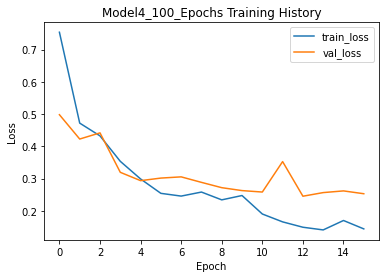

In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits
# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define custom CNN architecture with MobileNetV2 and additional layers
model = Sequential([
    base_model,
    Conv2D(64, (3, 3), activation='relu'),
    GlobalAveragePooling2D(),  # Global Average Pooling layer
    Dropout(0.5),  # Dropout layer to prevent overfitting
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+Conv2D+GLOBALAVGPOOL+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNet_Model4(100)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("Model4_100_Epochs Training History")
plt.show()


# MobileNetV2+LSTM+Dense Layers

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 435ms/step - accuracy: 0.5733 - auc_40: 0.6317 - auc_41: 0.5684 - false_negatives_20: 120.1154 - false_positives_20: 52.1538 - loss: 0.6750 - precision_20: 0.5953 - recall_20: 0.3873 - true_negatives_20: 170.2692 - true_positives_20: 88.2308 - val_accuracy: 0.8000 - val_auc_40: 0.8845 - val_auc_41: 0.8935 - val_false_negatives_20: 25.0000 - val_false_positives_20: 15.0000 - val_loss: 0.5524 - val_precision_20: 0.8404 - val_recall_20: 0.7596 - val_true_negatives_20: 81.0000 - val_true_positives_20: 79.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 403ms/step - accuracy: 0.8278 - auc_40: 0.9195 - auc_41: 0.9041 - false_negatives_20: 46.1154 - false_positives_20: 27.9615 - loss: 0.5067 - precision_20: 0.8668 - recall_20: 0.7595 - true_negatives_20: 194.4615 - true_positives_20: 162.2308 - val_accuracy: 0.7850 - val_auc_40: 0.8866 - val_auc_41: 0.8710 - val_false_negatives_20: 7.0000 - val_false_positives_20: 36.0000 - val_loss: 0.4873 - val_precis

Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 408ms/step - accuracy: 0.9753 - auc_40: 0.9975 - auc_41: 0.9973 - false_negatives_20: 9.9231 - false_positives_20: 2.2308 - loss: 0.0697 - precision_20: 0.9900 - recall_20: 0.9577 - true_negatives_20: 220.1923 - true_positives_20: 198.4231 - val_accuracy: 0.8750 - val_auc_40: 0.9633 - val_auc_41: 0.9665 - val_false_negatives_20: 3.0000 - val_false_positives_20: 22.0000 - val_loss: 0.3227 - val_precision_20: 0.8211 - val_recall_20: 0.9712 - val_true_negatives_20: 74.0000 - val_true_positives_20: 101.0000
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 12.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9014 - auc_40: 0.9703 - auc_41: 0.9738 - false_negatives_20: 8.2500 - false_positives_20: 4.5000 - loss: 0.2252 - precision_20: 0.9300 - recall_20: 0.8851 - true_negatives_20: 58.5000 - true_positives_20: 62.7500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 236ms/step
Model Details:
Model: MobileNetV2+LSTM+DENSE
Epochs: 20
Te

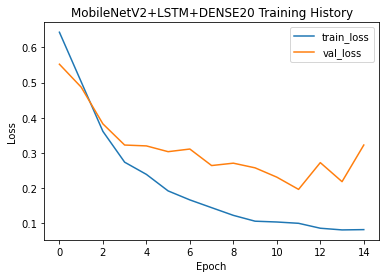

In [30]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
mobilenet_output = base_model(input_layer, training=False)
flatten = Flatten()(mobilenet_output)

# Reshape the data to include the timestep dimension
reshape = Reshape((-1, flatten.shape[1]))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+LSTM+DENSE',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+LSTM+DENSE20_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+LSTM+DENSE20 Training History")
plt.show()


Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 438ms/step - accuracy: 0.5940 - auc_42: 0.6213 - auc_43: 0.5561 - false_negatives_21: 71.5385 - false_positives_21: 90.8846 - loss: 0.7075 - precision_21: 0.5775 - recall_21: 0.6691 - true_negatives_21: 131.5385 - true_positives_21: 136.8077 - val_accuracy: 0.7550 - val_auc_42: 0.8477 - val_auc_43: 0.8607 - val_false_negatives_21: 12.0000 - val_false_positives_21: 37.0000 - val_loss: 0.5563 - val_precision_21: 0.7132 - val_recall_21: 0.8846 - val_true_negatives_21: 59.0000 - val_true_positives_21: 92.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 410ms/step - accuracy: 0.8171 - auc_42: 0.8942 - auc_43: 0.8768 - false_negatives_21: 38.3077 - false_positives_21: 43.5769 - loss: 0.5202 - precision_21: 0.7905 - recall_21: 0.8413 - true_negatives_21: 178.8462 - true_positives_21: 170.0385 - val_accuracy: 0.7800 - val_auc_42: 0.8851 - val_auc_43: 0.8693 - val_false_negatives_21: 1.0000 - val_false_positives_21: 43.0000 - val_loss: 0.5437 - val_precis

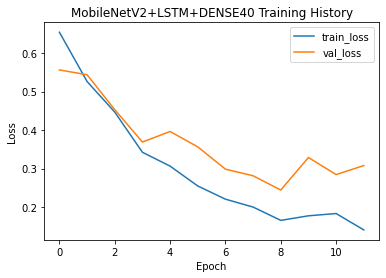

In [31]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
mobilenet_output = base_model(input_layer, training=False)
flatten = Flatten()(mobilenet_output)

# Reshape the data to include the timestep dimension
reshape = Reshape((-1, flatten.shape[1]))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+LSTM+DENSE',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+LSTM+DENSE40_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+LSTM+DENSE40 Training History")
plt.show()


Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 468ms/step - accuracy: 0.6475 - auc_44: 0.6815 - auc_45: 0.6593 - false_negatives_22: 94.5769 - false_positives_22: 48.6538 - loss: 0.6458 - precision_22: 0.6765 - recall_22: 0.5199 - true_negatives_22: 173.7692 - true_positives_22: 113.7692 - val_accuracy: 0.7350 - val_auc_44: 0.8737 - val_auc_45: 0.8919 - val_false_negatives_22: 8.0000 - val_false_positives_22: 45.0000 - val_loss: 0.5624 - val_precision_22: 0.6809 - val_recall_22: 0.9231 - val_true_negatives_22: 51.0000 - val_true_positives_22: 96.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 425ms/step - accuracy: 0.8113 - auc_44: 0.8958 - auc_45: 0.8922 - false_negatives_22: 52.7692 - false_positives_22: 29.5000 - loss: 0.4999 - precision_22: 0.8438 - recall_22: 0.7476 - true_negatives_22: 192.9231 - true_positives_22: 155.5769 - val_accuracy: 0.8450 - val_auc_44: 0.9286 - val_auc_45: 0.9342 - val_false_negatives_22: 18.0000 - val_false_positives_22: 13.0000 - val_loss: 0.4323 - val_precis

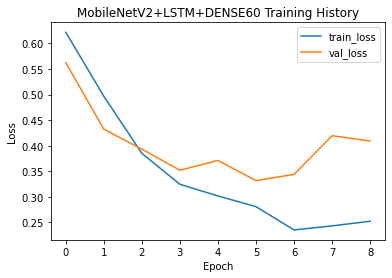

In [32]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
mobilenet_output = base_model(input_layer, training=False)
flatten = Flatten()(mobilenet_output)

# Reshape the data to include the timestep dimension
reshape = Reshape((-1, flatten.shape[1]))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+LSTM+DENSE',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+LSTM+DENSE60_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+LSTM+DENSE60 Training History")
plt.show()


Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 447ms/step - accuracy: 0.6285 - auc_46: 0.6822 - auc_47: 0.6106 - false_negatives_23: 97.1538 - false_positives_23: 56.5769 - loss: 0.6896 - precision_23: 0.6436 - recall_23: 0.5360 - true_negatives_23: 165.8462 - true_positives_23: 111.1923 - val_accuracy: 0.7100 - val_auc_46: 0.8643 - val_auc_47: 0.8818 - val_false_negatives_23: 4.0000 - val_false_positives_23: 54.0000 - val_loss: 0.5785 - val_precision_23: 0.6494 - val_recall_23: 0.9615 - val_true_negatives_23: 42.0000 - val_true_positives_23: 100.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 412ms/step - accuracy: 0.7953 - auc_46: 0.8915 - auc_47: 0.8841 - false_negatives_23: 55.6923 - false_positives_23: 31.1538 - loss: 0.5165 - precision_23: 0.8142 - recall_23: 0.7490 - true_negatives_23: 191.2692 - true_positives_23: 152.6538 - val_accuracy: 0.8200 - val_auc_46: 0.9120 - val_auc_47: 0.9169 - val_false_negatives_23: 28.0000 - val_false_positives_23: 8.0000 - val_loss: 0.4914 - val_precis

Epoch 15/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.9568 - auc_46: 0.9900 - auc_47: 0.9904 - false_negatives_23: 10.3077 - false_positives_23: 7.5769 - loss: 0.1362 - precision_23: 0.9549 - recall_23: 0.9557 - true_negatives_23: 214.8462 - true_positives_23: 198.0385 - val_accuracy: 0.8650 - val_auc_46: 0.9706 - val_auc_47: 0.9736 - val_false_negatives_23: 1.0000 - val_false_positives_23: 26.0000 - val_loss: 0.2788 - val_precision_23: 0.7984 - val_recall_23: 0.9904 - val_true_negatives_23: 70.0000 - val_true_positives_23: 103.0000
Epoch 15: early stopping
Restoring model weights from the end of the best epoch: 12.
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.8662 - auc_46: 0.9446 - auc_47: 0.9531 - false_negatives_23: 2.6250 - false_positives_23: 14.5000 - loss: 0.3031 - precision_23: 0.8210 - recall_23: 0.9625 - true_negatives_23: 48.5000 - true_positives_23: 68.3750
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 317ms/step
Model Details:
Model: MobileNetV2+LSTM+DENSE
Epochs: 80


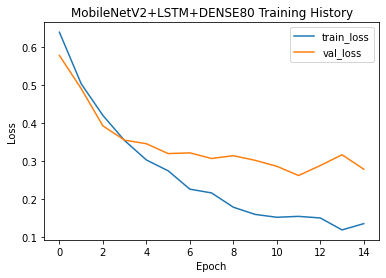

In [33]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
mobilenet_output = base_model(input_layer, training=False)
flatten = Flatten()(mobilenet_output)

# Reshape the data to include the timestep dimension
reshape = Reshape((-1, flatten.shape[1]))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+LSTM+DENSE',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+LSTM+DENSE80_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+LSTM+DENSE80 Training History")
plt.show()


Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 432ms/step - accuracy: 0.6113 - auc_48: 0.6846 - auc_49: 0.6276 - false_negatives_24: 103.5000 - false_positives_24: 55.6538 - loss: 0.6486 - precision_24: 0.6264 - recall_24: 0.4952 - true_negatives_24: 166.7692 - true_positives_24: 104.8462 - val_accuracy: 0.6650 - val_auc_48: 0.8416 - val_auc_49: 0.8685 - val_false_negatives_24: 12.0000 - val_false_positives_24: 55.0000 - val_loss: 0.5903 - val_precision_24: 0.6259 - val_recall_24: 0.8846 - val_true_negatives_24: 41.0000 - val_true_positives_24: 92.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.8039 - auc_48: 0.8795 - auc_49: 0.8752 - false_negatives_24: 61.9615 - false_positives_24: 27.1538 - loss: 0.5134 - precision_24: 0.8432 - recall_24: 0.7296 - true_negatives_24: 195.2692 - true_positives_24: 146.3846 - val_accuracy: 0.7950 - val_auc_48: 0.9146 - val_auc_49: 0.9303 - val_false_negatives_24: 14.0000 - val_false_positives_24: 27.0000 - val_loss: 0.4818 - val_pr

Epoch 15/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 400ms/step - accuracy: 0.9686 - auc_48: 0.9946 - auc_49: 0.9942 - false_negatives_24: 7.6538 - false_positives_24: 5.6923 - loss: 0.1162 - precision_24: 0.9720 - recall_24: 0.9629 - true_negatives_24: 216.7308 - true_positives_24: 200.6923 - val_accuracy: 0.8800 - val_auc_48: 0.9532 - val_auc_49: 0.9604 - val_false_negatives_24: 14.0000 - val_false_positives_24: 10.0000 - val_loss: 0.2750 - val_precision_24: 0.9000 - val_recall_24: 0.8654 - val_true_negatives_24: 86.0000 - val_true_positives_24: 90.0000
Epoch 16/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 402ms/step - accuracy: 0.9684 - auc_48: 0.9935 - auc_49: 0.9929 - false_negatives_24: 9.5000 - false_positives_24: 4.0000 - loss: 0.1093 - precision_24: 0.9800 - recall_24: 0.9523 - true_negatives_24: 218.4231 - true_positives_24: 198.8462 - val_accuracy: 0.8900 - val_auc_48: 0.9566 - val_auc_49: 0.9512 - val_false_negatives_24: 7.0000 - val_false_positives_24: 15.0000 - val_loss: 0.2595 - val_precis

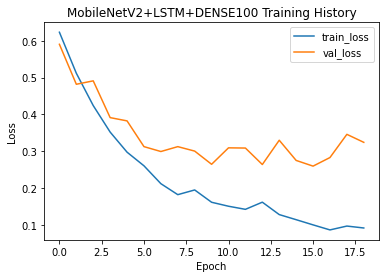

In [34]:
import numpy as np
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Reshape
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import tensorflow as tf
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.applications import MobileNetV2

# Start time
start_time = time.time()

# Assume X_train and y_train are the original splits

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.repeat(X_train_resized[..., np.newaxis], 3, -1)

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.repeat(X_test_resized[..., np.newaxis], 3, -1)

# Define the input shape
input_shape = (224, 224, 3)

# Load pre-trained MobileNetV2 model without top classification layer
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Define the CNN base model
input_layer = Input(shape=input_shape)
mobilenet_output = base_model(input_layer, training=False)
flatten = Flatten()(mobilenet_output)

# Reshape the data to include the timestep dimension
reshape = Reshape((-1, flatten.shape[1]))(flatten)

# Define the LSTM layer
lstm = LSTM(128)(reshape)

# Define the dense layers for classification
dense1 = Dense(64, activation='relu')(lstm)
output_layer = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.FalseNegatives(),
                                                                      tf.keras.metrics.TruePositives()])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model for 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, shuffle=False, validation_data=(X_test_resized, y_test), callbacks=[early_stopping], verbose=1)

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tn, fp, fn, tp = model.evaluate(X_test_resized, y_test)

# Calculate other metrics
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
classification_rep = classification_report(y_test, test_predictions, output_dict=True)
error_rate = np.mean(test_predictions != y_test)
roc_auc = roc_auc_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
precision, recall, _ = precision_recall_curve(y_test, test_predictions)
pr_auc = auc(recall, precision)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()
time_taken = end_time - start_time

# Create a dictionary to store model details and metrics
model_details = {
    'Model': 'MobileNetV2+LSTM+DENSE',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision_score(y_test, test_predictions),
    'Recall': recall_score(y_test, test_predictions),
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+LSTM+DENSE100_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+LSTM+DENSE100 Training History")
plt.show()


# MobileNetV2+GRU+Dense Layers

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_7 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 396ms/step - accuracy: 0.6273 - auc_50: 0.6751 - auc_51: 0.6889 - false_negatives_25: 60.8846 - false_positives_25: 83.6154 - loss: 0.6491 - precision_25: 0.6328 - recall_25: 0.7006 - true_negatives_25: 125.3077 - true_positives_25: 160.9615 - val_accuracy: 0.7950 - val_auc_50: 0.8876 - val_auc_51: 0.8798 - val_false_negatives_25: 20.0000 - val_false_positives_25: 21.0000 - val_loss: 0.4786 - val_precision_25: 0.8000 - val_recall_25: 0.8077 - val_true_negatives_25: 75.0000 - val_true_positives_25: 84.0000
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 371ms/step - accuracy: 0.8941 - auc_50: 0.9461 - auc_51: 0.9497 - false_negatives_25: 27.0000 - false_positives_25: 22.6923 - loss: 0.3923 - precision_25: 0.9063 - recall_25: 0.8886 - true_negatives_25: 186.2308 - true_positives_25: 194.8462 - val_accuracy: 0.8250 - val_auc_50: 0.9055 - val_auc_51: 0.9139 - val_false_negatives_25: 26.0000 - val_false_positives_25: 9.0000 - val_loss: 0.4348 - val_precisi

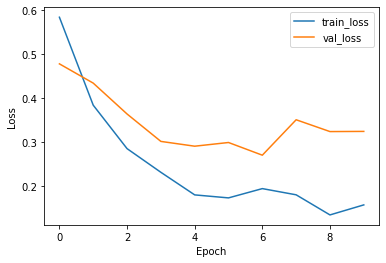

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 161ms/step - accuracy: 0.9130 - auc_50: 0.9643 - auc_51: 0.9720 - false_negatives_25: 7.1250 - false_positives_25: 5.6250 - loss: 0.2789 - precision_25: 0.9290 - recall_25: 0.9059 - true_negatives_25: 57.3750 - true_positives_25: 63.8750
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 302ms/step
Model Details:
Model: MobileNetV2+GRU+DENSE
Epochs: 10
Test Accuracy: 0.8999999761581421
Test Loss: 0.27108994126319885
Validation Accuracy: 0.8399999737739563
Validation Loss: 0.32514241337776184
Precision: 0.9117647058823529
Recall: 0.8942307692307693
AUC-ROC: 0.9002403846153846
AUC-PR: 9.0
True Negatives: 87.0
False Positives: 0.8942307829856873
False Negatives: 93.0
True Positives: 0.9117646813392639
Error Rate: 0.5164528845332286
F1 Score: 0.9029126213592232
Cohen's Kappa: 0.799839871897518
Matthews Correlation Coefficient: 0.8000001442884715
Balanced Accuracy: 0.9002403846153846
Time Taken (seconds): 98.75259447097778


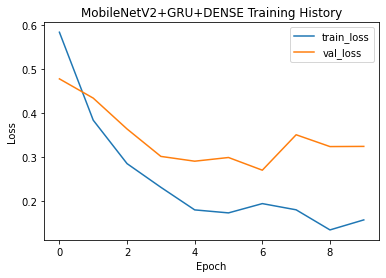

In [35]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained MobileNetV2 model without the top layer
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in MobileNetV2
for layer in mobilenet_base.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
model = Sequential([
    mobilenet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'MobileNetV2+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GRU+DENSE(20)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+GRU+DENSE Training History")
plt.show()


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_16 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_8 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_58 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 397ms/step - accuracy: 0.7021 - auc_52: 0.7556 - auc_53: 0.7503 - false_negatives_26: 56.0000 - false_positives_26: 59.8462 - loss: 0.5895 - precision_26: 0.7153 - recall_26: 0.7205 - true_negatives_26: 149.0769 - true_positives_26: 165.8462 - val_accuracy: 0.8150 - val_auc_52: 0.9208 - val_auc_53: 0.9285 - val_false_negatives_26: 26.0000 - val_false_positives_26: 11.0000 - val_loss: 0.4417 - val_precision_26: 0.8764 - val_recall_26: 0.7500 - val_true_negatives_26: 85.0000 - val_true_positives_26: 78.0000
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 360ms/step - accuracy: 0.8989 - auc_52: 0.9517 - auc_53: 0.9539 - false_negatives_26: 25.1538 - false_positives_26: 23.0000 - loss: 0.3504 - precision_26: 0.9124 - recall_26: 0.8929 - true_negatives_26: 185.9231 - true_positives_26: 196.6923 - val_accuracy: 0.8400 - val_auc_52: 0.9325 - val_auc_53: 0.9400 - val_false_negatives_26: 23.0000 - val_false_positives_26: 9.0000 - val_loss: 0.3648 - val_precisi

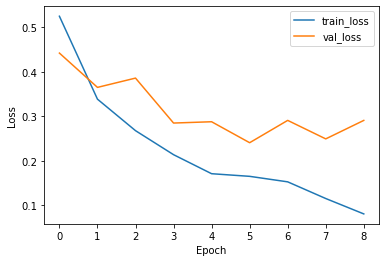

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.9000 - auc_52: 0.9680 - auc_53: 0.9733 - false_negatives_26: 7.2500 - false_positives_26: 7.1250 - loss: 0.2401 - precision_26: 0.9077 - recall_26: 0.9051 - true_negatives_26: 55.8750 - true_positives_26: 63.7500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step
Model Details:
Model: MobileNetV2+GRU+DENSE
Epochs: 9
Test Accuracy: 0.8899999856948853
Test Loss: 0.2407568395137787
Validation Accuracy: 0.8700000047683716
Validation Loss: 0.29077810049057007
Precision: 0.8942307692307693
Recall: 0.8942307692307693
AUC-ROC: 0.8898237179487178
AUC-PR: 11.0
True Negatives: 85.0
False Positives: 0.8942307829856873
False Negatives: 93.0
True Positives: 0.8942307829856873
Error Rate: 0.522248368806094
F1 Score: 0.8942307692307693
Cohen's Kappa: 0.7796474358974359
Matthews Correlation Coefficient: 0.7796474358974359
Balanced Accuracy: 0.889823717948718
Time Taken (seconds): 90.43663120269775


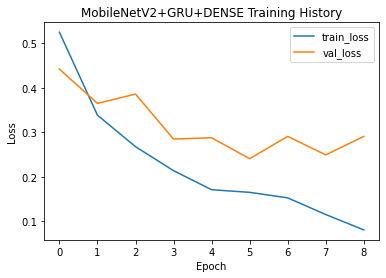

In [36]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained MobileNetV2 model without the top layer
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in MobileNetV2
for layer in mobilenet_base.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
model = Sequential([
    mobilenet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'MobileNetV2+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GRU+DENSE(40)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+GRU+DENSE Training History")
plt.show()


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_9 (Reshape)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 394ms/step - accuracy: 0.6641 - auc_54: 0.7237 - auc_55: 0.7491 - false_negatives_27: 58.0000 - false_positives_27: 70.8462 - loss: 0.6039 - precision_27: 0.6693 - recall_27: 0.7193 - true_negatives_27: 138.0769 - true_positives_27: 163.8462 - val_accuracy: 0.7650 - val_auc_54: 0.8906 - val_auc_55: 0.9066 - val_false_negatives_27: 43.0000 - val_false_positives_27: 4.0000 - val_loss: 0.4804 - val_precision_27: 0.9385 - val_recall_27: 0.5865 - val_true_negatives_27: 92.0000 - val_true_positives_27: 61.0000
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 365ms/step - accuracy: 0.8608 - auc_54: 0.9305 - auc_55: 0.9327 - false_negatives_27: 37.5000 - false_positives_27: 28.2308 - loss: 0.3641 - precision_27: 0.8963 - recall_27: 0.8331 - true_negatives_27: 180.6923 - true_positives_27: 184.3462 - val_accuracy: 0.8400 - val_auc_54: 0.9297 - val_auc_55: 0.9364 - val_false_negatives_27: 9.0000 - val_false_positives_27: 23.0000 - val_loss: 0.3698 - val_precisio

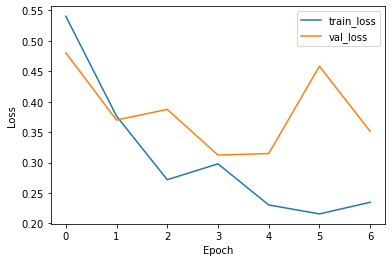

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - accuracy: 0.8213 - auc_54: 0.9317 - auc_55: 0.9451 - false_negatives_27: 13.1250 - false_positives_27: 10.5000 - loss: 0.3367 - precision_27: 0.8489 - recall_27: 0.8116 - true_negatives_27: 52.5000 - true_positives_27: 57.8750
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 251ms/step
Model Details:
Model: MobileNetV2+GRU+DENSE
Epochs: 7
Test Accuracy: 0.8349999785423279
Test Loss: 0.31226515769958496
Validation Accuracy: 0.8600000143051147
Validation Loss: 0.3511584401130676
Precision: 0.8514851485148515
Recall: 0.8269230769230769
AUC-ROC: 0.8353365384615384
AUC-PR: 15.0
True Negatives: 81.0
False Positives: 0.8269230723381042
False Negatives: 86.0
True Positives: 0.8514851331710815
Error Rate: 0.5147482952681922
F1 Score: 0.8390243902439023
Cohen's Kappa: 0.6698679471788715
Matthews Correlation Coefficient: 0.670169833003694
Balanced Accuracy: 0.8353365384615384
Time Taken (seconds): 72.64798283576965


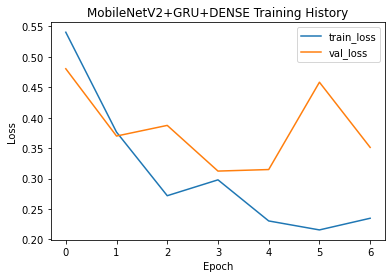

In [37]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained MobileNetV2 model without the top layer
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in MobileNetV2
for layer in mobilenet_base.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
model = Sequential([
    mobilenet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'MobileNetV2+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GRU+DENSE(60)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+GRU+DENSE Training History")
plt.show()


Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_18 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_10 (Reshape)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_61 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 397ms/step - accuracy: 0.6366 - auc_56: 0.6870 - auc_57: 0.6647 - false_negatives_28: 64.3077 - false_positives_28: 83.8077 - loss: 0.6516 - precision_28: 0.6490 - recall_28: 0.6755 - true_negatives_28: 125.1154 - true_positives_28: 157.5385 - val_accuracy: 0.7950 - val_auc_56: 0.8940 - val_auc_57: 0.8927 - val_false_negatives_28: 25.0000 - val_false_positives_28: 16.0000 - val_loss: 0.5100 - val_precision_28: 0.8316 - val_recall_28: 0.7596 - val_true_negatives_28: 80.0000 - val_true_positives_28: 79.0000
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 368ms/step - accuracy: 0.8655 - auc_56: 0.9323 - auc_57: 0.9322 - false_negatives_28: 28.4231 - false_positives_28: 32.9231 - loss: 0.4235 - precision_28: 0.8756 - recall_28: 0.8687 - true_negatives_28: 176.0000 - true_positives_28: 193.4231 - val_accuracy: 0.8500 - val_auc_56: 0.9331 - val_auc_57: 0.9398 - val_false_negatives_28: 21.0000 - val_false_positives_28: 9.0000 - val_loss: 0.3935 - val_precisi

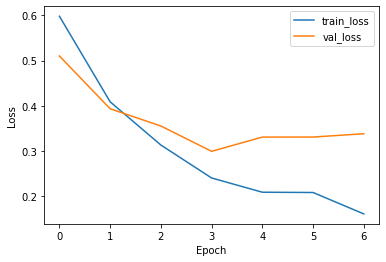

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.8448 - auc_56: 0.9396 - auc_57: 0.9390 - false_negatives_28: 11.7500 - false_positives_28: 7.6250 - loss: 0.3324 - precision_28: 0.8865 - recall_28: 0.8187 - true_negatives_28: 55.3750 - true_positives_28: 59.2500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 245ms/step
Model Details:
Model: MobileNetV2+GRU+DENSE
Epochs: 7
Test Accuracy: 0.8700000047683716
Test Loss: 0.2995390295982361
Validation Accuracy: 0.8500000238418579
Validation Loss: 0.33832406997680664
Precision: 0.8979591836734694
Recall: 0.8461538461538461
AUC-ROC: 0.8709935897435898
AUC-PR: 10.0
True Negatives: 86.0
False Positives: 0.8461538553237915
False Negatives: 88.0
True Positives: 0.8979591727256775
Error Rate: 0.5055427025378858
F1 Score: 0.8712871287128713
Cohen's Kappa: 0.7402078337330136
Matthews Correlation Coefficient: 0.7415416752864111
Balanced Accuracy: 0.8709935897435898
Time Taken (seconds): 71.57010293006897


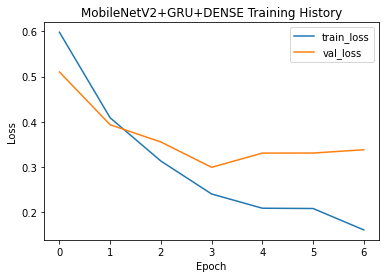

In [38]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained MobileNetV2 model without the top layer
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in MobileNetV2
for layer in mobilenet_base.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
model = Sequential([
    mobilenet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'MobileNetV2+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GRU+DENSE(80)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+GRU+DENSE Training History")
plt.show()


Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224            │ ?                      │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_19 (Flatten)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_11 (Reshape)            │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_4 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 12s 407ms/step - accuracy: 0.6824 - auc_58: 0.7320 - auc_59: 0.7225 - false_negatives_29: 51.6923 - false_positives_29: 76.0385 - loss: 0.6071 - precision_29: 0.6736 - recall_29: 0.7839 - true_negatives_29: 132.8846 - true_positives_29: 170.1538 - val_accuracy: 0.7650 - val_auc_58: 0.8747 - val_auc_59: 0.8804 - val_false_negatives_29: 29.0000 - val_false_positives_29: 18.0000 - val_loss: 0.4809 - val_precision_29: 0.8065 - val_recall_29: 0.7212 - val_true_negatives_29: 78.0000 - val_true_positives_29: 75.0000
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 366ms/step - accuracy: 0.8491 - auc_58: 0.9341 - auc_59: 0.9429 - false_negatives_29: 35.4231 - false_positives_29: 34.9615 - loss: 0.3906 - precision_29: 0.8652 - recall_29: 0.8445 - true_negatives_29: 173.9615 - true_positives_29: 186.4231 - val_accuracy: 0.8550 - val_auc_58: 0.9343 - val_auc_59: 0.9353 - val_false_negatives_29: 12.0000 - val_false_positives_29: 17.0000 - val_loss: 0.3375 - val_prec

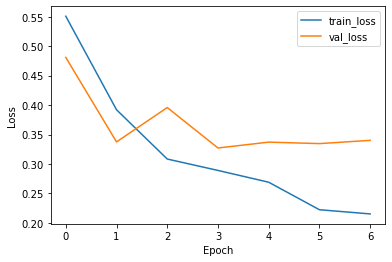

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 159ms/step - accuracy: 0.8455 - auc_58: 0.9435 - auc_59: 0.9549 - false_negatives_29: 12.7500 - false_positives_29: 6.6250 - loss: 0.3359 - precision_29: 0.8922 - recall_29: 0.8123 - true_negatives_29: 56.3750 - true_positives_29: 58.2500
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 230ms/step
Model Details:
Model: MobileNetV2+GRU+DENSE
Epochs: 7
Test Accuracy: 0.8650000095367432
Test Loss: 0.3271765112876892
Validation Accuracy: 0.8550000190734863
Validation Loss: 0.34017065167427063
Precision: 0.9052631578947369
Recall: 0.8269230769230769
AUC-ROC: 0.8665865384615384
AUC-PR: 9.0
True Negatives: 87.0
False Positives: 0.8269230723381042
False Negatives: 86.0
True Positives: 0.9052631855010986
Error Rate: 0.49691430601236863
F1 Score: 0.8643216080402011
Cohen's Kappa: 0.7305389221556886
Matthews Correlation Coefficient: 0.7335037571219197
Balanced Accuracy: 0.8665865384615384
Time Taken (seconds): 71.71656036376953


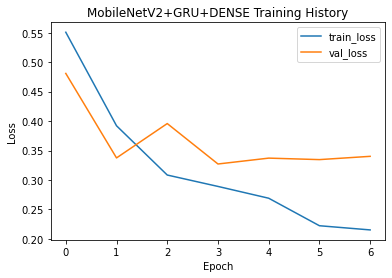

In [39]:
import numpy as np
from tensorflow.keras.layers import GRU, Dense, Reshape, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import cv2
import pandas as pd
import time
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_train_resized])  # Convert to RGB

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.array([cv2.cvtColor(img, cv2.COLOR_GRAY2RGB) for img in X_test_resized])  # Convert to RGB

# Load pre-trained MobileNetV2 model without the top layer
mobilenet_base = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in MobileNetV2
for layer in mobilenet_base.layers:
    layer.trainable = False

# Add custom layers on top of MobileNetV2
model = Sequential([
    mobilenet_base,
    Flatten(),  # Flatten layer to flatten the output of the convolutional layers
    Reshape((1, -1)),  # Reshape to 3D tensor for GRU
    GRU(128),  # GRU layer with 128 units
    Dense(100, activation='relu'),  # Dense layer with 100 units
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model with Adam optimizer
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy',
                                                                      tf.keras.metrics.Precision(),
                                                                      tf.keras.metrics.Recall(),
                                                                      tf.keras.metrics.AUC(),
                                                                      tf.keras.metrics.AUC(curve='PR'),
                                                                      tf.keras.metrics.TruePositives(),
                                                                      tf.keras.metrics.FalsePositives(),
                                                                      tf.keras.metrics.TrueNegatives(),
                                                                      tf.keras.metrics.FalseNegatives()])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy, precision, recall, auc_roc, auc_pr, tp, fp, tn, fn = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)

# End time
end_time = time.time()

# Calculate time taken
time_taken = end_time - start_time

# Additional Metrics
pr_auc = auc_pr
error_rate = (fp + fn) / (tp + tn + fp + fn)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_accuracy = balanced_accuracy_score(y_test, test_predictions)

# Model details dictionary
model_details = {
    'Model': 'MobileNetV2+GRU+DENSE',
    'Epochs': len(history.history['loss']),
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'AUC-PR': pr_auc,
    'True Negatives': tn,
    'False Positives': fp,
    'False Negatives': fn,
    'True Positives': tp,
    'Error Rate': error_rate,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_accuracy,
    'Time Taken (seconds)': time_taken
}

# Print model details and metrics
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Write model details and metrics to CSV file
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2+GRU+DENSE(100)_Metrics.csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2+GRU+DENSE Training History")
plt.show()


# MobileNetV2+Attention+Dense

Model: "functional_36"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_64      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_64[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,898,945 (14.87 MB)

 Trainable params: 1,640,961 (6.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 273ms/step - accuracy: 0.5514 - loss: 0.6904 - val_accuracy: 0.7700 - val_loss: 0.6743
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.7707 - loss: 0.6615 - val_accuracy: 0.7800 - val_loss: 0.6438
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 253ms/step - accuracy: 0.8488 - loss: 0.6248 - val_accuracy: 0.8400 - val_loss: 0.6145
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.9068 - loss: 0.5864 - val_accuracy: 0.8400 - val_loss: 0.5851
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9281 - loss: 0.5507 - val_accuracy: 0.8450 - val_loss: 0.5569
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9347 - loss: 0.5166 - val_accuracy: 0.8400 - val_loss: 0.5369
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9438 - loss: 0.4867 - val_accuracy: 0.8400 - val_loss: 0.5183
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9509 - loss: 0.4588 - val_accuracy: 0.

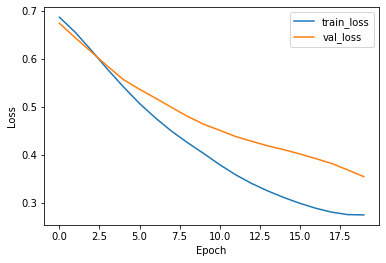

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 150ms/step - accuracy: 0.8913 - loss: 0.3672
Test Accuracy: 90.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 214ms/step
Confusion Matrix:
[[85 11]
 [ 9 95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89        96
           1       0.90      0.91      0.90       104

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

AUC Score: 0.90

Precision: 0.8962264150943396
Recall: 0.9134615384615384
F1 Score: 0.9047619047619048
Cohen's Kappa Coefficient: 0.7995188452285485
Matthews Correlation Coefficient (MCC): 0.7996795677583498
Balanced Accuracy: 0.8994391025641025
Time taken: 133.02 seconds


In [40]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['MobileNetV2_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('Model7(20).csv', index=False)


Model: "functional_38"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_65      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_65[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,898,945 (14.87 MB)

 Trainable params: 1,640,961 (6.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 275ms/step - accuracy: 0.5506 - loss: 0.6902 - val_accuracy: 0.7200 - val_loss: 0.6734
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.7874 - loss: 0.6612 - val_accuracy: 0.7650 - val_loss: 0.6423
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 254ms/step - accuracy: 0.8475 - loss: 0.6175 - val_accuracy: 0.7950 - val_loss: 0.6093
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.8953 - loss: 0.5735 - val_accuracy: 0.8250 - val_loss: 0.5712
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9271 - loss: 0.5309 - val_accuracy: 0.8450 - val_loss: 0.5413
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 255ms/step - accuracy: 0.9378 - loss: 0.4949 - val_accuracy: 0.8650 - val_loss: 0.5138
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.9455 - loss: 0.4627 - val_accuracy: 0.8700 - val_loss: 0.4877
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 256ms/step - accuracy: 0.9508 - loss: 0.4323 - val_accuracy: 0.

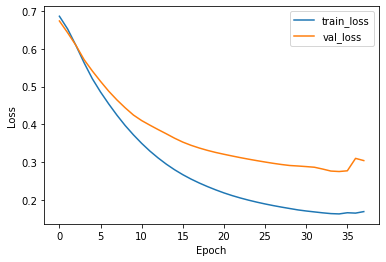

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8980 - loss: 0.2825
Test Accuracy: 90.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 226ms/step
Confusion Matrix:
[[88  8]
 [12 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        96
           1       0.92      0.88      0.90       104

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200

AUC Score: 0.90

Precision: 0.92
Recall: 0.8846153846153846
F1 Score: 0.9019607843137256
Cohen's Kappa Coefficient: 0.8
Matthews Correlation Coefficient (MCC): 0.8006407690254356
Balanced Accuracy: 0.9006410256410255
Time taken: 250.05 seconds


In [41]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['MobileNetV2_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('Model7(40).csv', index=False)


Model: "functional_40"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_66      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_66[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,898,945 (14.87 MB)

 Trainable params: 1,640,961 (6.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 290ms/step - accuracy: 0.5606 - loss: 0.6895 - val_accuracy: 0.7250 - val_loss: 0.6700
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.7870 - loss: 0.6599 - val_accuracy: 0.7800 - val_loss: 0.6444
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.8625 - loss: 0.6221 - val_accuracy: 0.8150 - val_loss: 0.6159
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.8808 - loss: 0.5868 - val_accuracy: 0.8350 - val_loss: 0.5873
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 276ms/step - accuracy: 0.9143 - loss: 0.5505 - val_accuracy: 0.8650 - val_loss: 0.5635
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 269ms/step - accuracy: 0.9322 - loss: 0.5200 - val_accuracy: 0.8550 - val_loss: 0.5411
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 273ms/step - accuracy: 0.9428 - loss: 0.4920 - val_accuracy: 0.8650 - val_loss: 0.5215
Epoch 8/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 274ms/step - accuracy: 0.9489 - loss: 0.4666 - val_accuracy: 0.

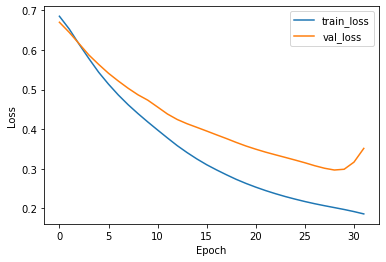

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.9170 - loss: 0.2845
Test Accuracy: 91.00%
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 290ms/step
Confusion Matrix:
[[85 11]
 [ 7 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.89      0.90        96
           1       0.90      0.93      0.92       104

    accuracy                           0.91       200
   macro avg       0.91      0.91      0.91       200
weighted avg       0.91      0.91      0.91       200

AUC Score: 0.91

Precision: 0.8981481481481481
Recall: 0.9326923076923077
F1 Score: 0.9150943396226415
Cohen's Kappa Coefficient: 0.819422150882825
Matthews Correlation Coefficient (MCC): 0.8200827021354601
Balanced Accuracy: 0.9090544871794872
Time taken: 217.44 seconds


In [42]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['MobileNetV2_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('Model7(60).csv', index=False)


Model: "functional_42"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_67      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_67[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,898,945 (14.87 MB)

 Trainable params: 1,640,961 (6.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 8s 277ms/step - accuracy: 0.5126 - loss: 0.6907 - val_accuracy: 0.7000 - val_loss: 0.6779
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 258ms/step - accuracy: 0.7329 - loss: 0.6682 - val_accuracy: 0.7750 - val_loss: 0.6461
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 257ms/step - accuracy: 0.8593 - loss: 0.6264 - val_accuracy: 0.8050 - val_loss: 0.6149
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.8961 - loss: 0.5859 - val_accuracy: 0.8500 - val_loss: 0.5728
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.9209 - loss: 0.5411 - val_accuracy: 0.8600 - val_loss: 0.5445
Epoch 6/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 268ms/step - accuracy: 0.9372 - loss: 0.5058 - val_accuracy: 0.8650 - val_loss: 0.5175
Epoch 7/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 267ms/step - accuracy: 0.9449 - loss: 0.4761 - val_accuracy: 0.8900 - val_loss: 0.4895
Epoch 8/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.9547 - loss: 0.4473 - val_accuracy: 0.

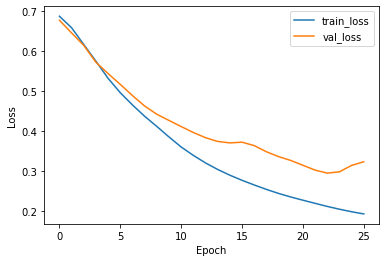

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.9150 - loss: 0.3127
Test Accuracy: 91.50%
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 217ms/step
Confusion Matrix:
[[87  9]
 [ 8 96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        96
           1       0.91      0.92      0.92       104

    accuracy                           0.92       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.92      0.91       200

AUC Score: 0.91

Precision: 0.9142857142857143
Recall: 0.9230769230769231
F1 Score: 0.9186602870813396
Cohen's Kappa Coefficient: 0.8296593186372745
Matthews Correlation Coefficient (MCC): 0.8297009711706961
Balanced Accuracy: 0.9146634615384616
Time taken: 174.59 seconds


In [43]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['MobileNetV2_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('Model7(80).csv', index=False)


Model: "functional_44"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_68      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_68[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 3,898,945 (14.87 MB)

 Trainable params: 1,640,961 (6.26 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 9s 278ms/step - accuracy: 0.5338 - loss: 0.6905 - val_accuracy: 0.7300 - val_loss: 0.6747
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.8028 - loss: 0.6591 - val_accuracy: 0.7950 - val_loss: 0.6399
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.8678 - loss: 0.6185 - val_accuracy: 0.8350 - val_loss: 0.6143
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.9166 - loss: 0.5804 - val_accuracy: 0.8400 - val_loss: 0.5895
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 260ms/step - accuracy: 0.9315 - loss: 0.5457 - val_accuracy: 0.8550 - val_loss: 0.5671
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 259ms/step - accuracy: 0.9378 - loss: 0.5129 - val_accuracy: 0.8600 - val_loss: 0.5469
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.9500 - loss: 0.4845 - val_accuracy: 0.8700 - val_loss: 0.5279
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 260ms/step - accuracy: 0.9588 - loss: 0.4582 - val_accu

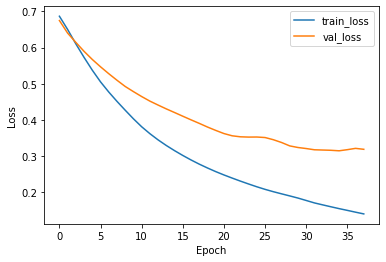

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8807 - loss: 0.3310
Test Accuracy: 89.50%
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 216ms/step
Confusion Matrix:
[[87  9]
 [12 92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        96
           1       0.91      0.88      0.90       104

    accuracy                           0.90       200
   macro avg       0.89      0.90      0.89       200
weighted avg       0.90      0.90      0.90       200

AUC Score: 0.90

Precision: 0.9108910891089109
Recall: 0.8846153846153846
F1 Score: 0.8975609756097561
Cohen's Kappa Coefficient: 0.7899159663865546
Matthews Correlation Coefficient (MCC): 0.7902719536136751
Balanced Accuracy: 0.8954326923076923
Time taken: 252.98 seconds


In [44]:
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Reshape, Multiply, Lambda
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import cv2
import time
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
import pandas as pd

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add attention mechanism
x = GlobalAveragePooling2D()(base_model.output)
x = Reshape((1, -1))(x)  # Reshape to 3D tensor for attention mechanism
attention_probs = Dense(np.prod(x.shape[2:]), activation='softmax', name='attention_probs')(x)
attention_mul = Multiply()([x, attention_probs])
attention_mul = Lambda(lambda x: K.sum(x, axis=1))(attention_mul)  # Sum along the time axis

# Add dense layers for classification
output = Dense(1, activation='sigmoid')(attention_mul)

# Create the full model
model_attention = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model_attention.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model_attention.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 100 epochs
history = model_attention.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model_attention.evaluate(X_test_resized, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

# Confusion matrix
test_predictions = (model_attention.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, test_predictions))

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)
print(f'AUC Score: {roc_auc:.2f}')

# Calculate Precision, Recall, F1 Score, Cohen's Kappa, Matthews Correlation Coefficient, and Balanced Accuracy
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# Print additional metrics
print("\nPrecision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Cohen's Kappa Coefficient:", kappa)
print("Matthews Correlation Coefficient (MCC):", mcc)
print("Balanced Accuracy:", balanced_acc)

# End time
end_time = time.time()

# Print the time taken
print(f"Time taken: {end_time - start_time:.2f} seconds")

# Save metrics to CSV
metrics_df = pd.DataFrame({
    'Model': ['MobileNetV2_Attention'],
    'Test Accuracy': [test_accuracy],
    'Test Loss': [test_loss],
    'Precision': [precision],
    'Recall': [recall],
    'F1 Score': [f1],
    'Cohen\'s Kappa Coefficient': [kappa],
    'Matthews Corr. Coef.': [mcc],
    'Balanced Accuracy': [balanced_acc],
    'AUC Score': [roc_auc],
    'Training Time (s)': [end_time - start_time],
    'Training Loss': [history.history['loss'][-1]],
    'Testing Loss': [test_loss],
    'Training Accuracy': [history.history['accuracy'][-1]],
    'Testing Accuracy': [test_accuracy]
})

metrics_df.to_csv('Model7(100).csv', index=False)


# MobileNetV2+CapsuleNetwork+Dense

Model: "functional_46"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_69      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_69[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,442,593 (9.32 MB)

 Trainable params: 2,408,481 (9.19 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7531 - loss: 0.5532 - val_accuracy: 0.5200 - val_loss: 0.9556
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8460 - loss: 0.4204 - val_accuracy: 0.5200 - val_loss: 1.0320
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8968 - loss: 0.3175 - val_accuracy: 0.5300 - val_loss: 1.0657
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9254 - loss: 0.2608 - val_accuracy: 0.6350 - val_loss: 0.8307
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9055 - loss: 0.2873 - val_accuracy: 0.5250 - val_loss: 1.1842
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9107 - loss: 0.2864 - val_accuracy: 0.5250 - val_loss: 1.1068
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9408 - loss: 0.2331 - val_accuracy: 0.5250 - val_loss: 1.3037
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


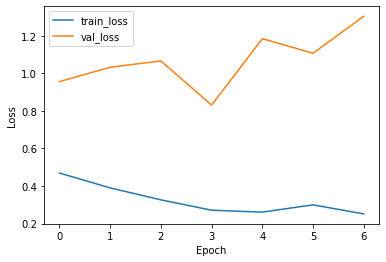

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.6415 - loss: 0.8083
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 224ms/step
Model Details:
Model: MobileNetV2 + Capsule Network + Dense
Epochs: 20
Test Accuracy: 0.6349999904632568
Test Loss: 0.8306930661201477
Validation Accuracy: 0.5249999761581421
Validation Loss: 1.3036823272705078
Precision: 0.5885714285714285
Recall: 0.9903846153846154
AUC-ROC: 0.6201923076923077
True Negatives: 24
False Positives: 72
False Negatives: 1
True Positives: 103
Error Rate: 0.36500000953674316
F1 Score: 0.7383512544802867
Cohen's Kappa: 0.24742268041237114
Matthews Correlation Coefficient: 0.36313651960128146
Balanced Accuracy: 0.6201923076923077
Time Taken (seconds): 209.6908462047577


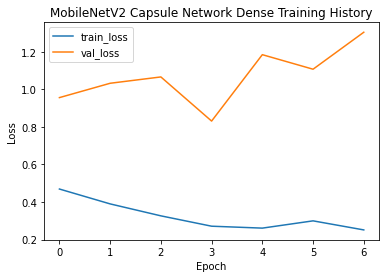

In [45]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=20, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'MobileNetV2 + Capsule Network + Dense',
    'Epochs': 20,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2_Model8(20).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2 Capsule Network Dense Training History")
plt.show()



Model: "functional_48"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_70      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_70[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,442,593 (9.32 MB)

 Trainable params: 2,408,481 (9.19 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7709 - loss: 0.5370 - val_accuracy: 0.5200 - val_loss: 0.9486
Epoch 2/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8957 - loss: 0.3454 - val_accuracy: 0.5200 - val_loss: 1.0346
Epoch 3/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8479 - loss: 0.4032 - val_accuracy: 0.5450 - val_loss: 1.0022
Epoch 4/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8947 - loss: 0.3103 - val_accuracy: 0.6100 - val_loss: 0.9201
Epoch 5/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9449 - loss: 0.2283 - val_accuracy: 0.6650 - val_loss: 0.8566
Epoch 6/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9374 - loss: 0.2328 - val_accuracy: 0.6900 - val_loss: 0.7483
Epoch 7/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9308 - loss: 0.2328 - val_accuracy: 0.7400 - val_loss: 0.6987
Epoch 8/40
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9303 - loss: 0.2319 - val_accuracy: 0.7250 - val_loss:

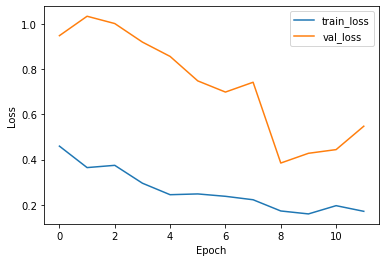

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.8274 - loss: 0.4278
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step
Model Details:
Model: MobileNetV2 + Capsule Network + Dense
Epochs: 40
Test Accuracy: 0.8399999737739563
Test Loss: 0.3843643069267273
Validation Accuracy: 0.6800000071525574
Validation Loss: 0.547488272190094
Precision: 0.9864864864864865
Recall: 0.7019230769230769
AUC-ROC: 0.8457532051282051
True Negatives: 95
False Positives: 1
False Negatives: 31
True Positives: 73
Error Rate: 0.1600000262260437
F1 Score: 0.8202247191011235
Cohen's Kappa: 0.6832937450514647
Matthews Correlation Coefficient: 0.715562156300345
Balanced Accuracy: 0.8457532051282051
Time Taken (seconds): 350.0843913555145


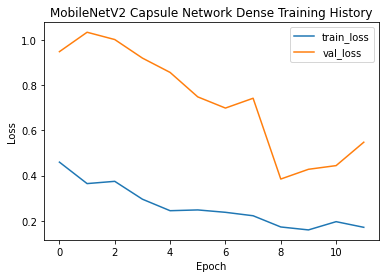

In [46]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=40, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'MobileNetV2 + Capsule Network + Dense',
    'Epochs': 40,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2_Model8(40).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2 Capsule Network Dense Training History")
plt.show()



Model: "functional_50"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_71      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_71[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,442,593 (9.32 MB)

 Trainable params: 2,408,481 (9.19 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.7895 - loss: 0.5323 - val_accuracy: 0.5200 - val_loss: 0.9532
Epoch 2/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8641 - loss: 0.3766 - val_accuracy: 0.5600 - val_loss: 0.9163
Epoch 3/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9360 - loss: 0.2674 - val_accuracy: 0.8400 - val_loss: 0.4024
Epoch 4/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9356 - loss: 0.2540 - val_accuracy: 0.8300 - val_loss: 0.3746
Epoch 5/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9015 - loss: 0.3029 - val_accuracy: 0.8350 - val_loss: 0.4032
Epoch 6/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9444 - loss: 0.2263 - val_accuracy: 0.6400 - val_loss: 0.7810
Epoch 7/60
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9253 - loss: 0.2588 - val_accuracy: 0.6200 - val_loss: 0.7819
Epoch 7: early stopping
Restoring model weights from the end of the best epoch: 4.


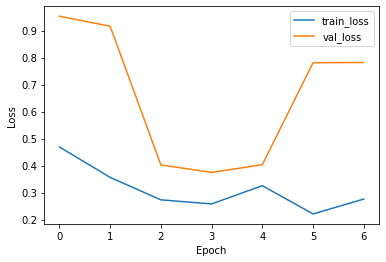

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step - accuracy: 0.8277 - loss: 0.3915
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 218ms/step
Model Details:
Model: MobileNetV2 + Capsule Network + Dense
Epochs: 60
Test Accuracy: 0.8299999833106995
Test Loss: 0.37457147240638733
Validation Accuracy: 0.6200000047683716
Validation Loss: 0.7818678617477417
Precision: 0.926829268292683
Recall: 0.7307692307692307
AUC-ROC: 0.8341346153846154
True Negatives: 90
False Positives: 6
False Negatives: 28
True Positives: 76
Error Rate: 0.17000001668930054
F1 Score: 0.8172043010752689
Cohen's Kappa: 0.6624305003971406
Matthews Correlation Coefficient: 0.6788218634758415
Balanced Accuracy: 0.8341346153846154
Time Taken (seconds): 210.8395481109619


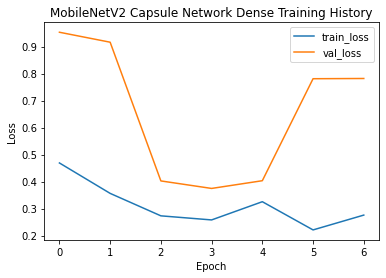

In [47]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=60, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'MobileNetV2 + Capsule Network + Dense',
    'Epochs': 60,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2_Model8(60).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2 Capsule Network Dense Training History")
plt.show()



Model: "functional_52"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_72      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_72[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,442,593 (9.32 MB)

 Trainable params: 2,408,481 (9.19 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7555 - loss: 0.5544 - val_accuracy: 0.5200 - val_loss: 0.9499
Epoch 2/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8715 - loss: 0.3716 - val_accuracy: 0.7650 - val_loss: 0.5571
Epoch 3/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.8759 - loss: 0.3569 - val_accuracy: 0.5950 - val_loss: 0.9403
Epoch 4/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9169 - loss: 0.2816 - val_accuracy: 0.5300 - val_loss: 1.1349
Epoch 5/80
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9035 - loss: 0.3067 - val_accuracy: 0.5750 - val_loss: 0.9744
Epoch 5: early stopping
Restoring model weights from the end of the best epoch: 2.


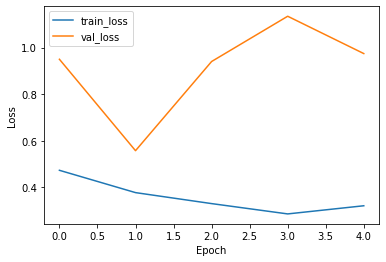

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 153ms/step - accuracy: 0.7544 - loss: 0.5617
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 220ms/step
Model Details:
Model: MobileNetV2 + Capsule Network + Dense
Epochs: 80
Test Accuracy: 0.7649999856948853
Test Loss: 0.557101309299469
Validation Accuracy: 0.574999988079071
Validation Loss: 0.9744248986244202
Precision: 0.6938775510204082
Recall: 0.9807692307692307
AUC-ROC: 0.7560096153846154
True Negatives: 51
False Positives: 45
False Negatives: 2
True Positives: 102
Error Rate: 0.23500001430511475
F1 Score: 0.8127490039840637
Cohen's Kappa: 0.5209947003668978
Matthews Correlation Coefficient: 0.5796181238670173
Balanced Accuracy: 0.7560096153846154
Time Taken (seconds): 152.30386352539062


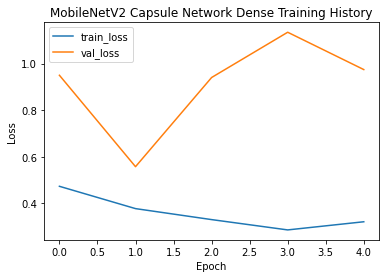

In [48]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=80, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'MobileNetV2 + Capsule Network + Dense',
    'Epochs': 80,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2_Model8(80).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2 Capsule Network Dense Training History")
plt.show()



Model: "functional_54"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_73      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer_73[0… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,442,593 (9.32 MB)

 Trainable params: 2,408,481 (9.19 MB)

 Non-trainable params: 34,112 (133.25 KB)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.7335 - loss: 0.5518 - val_accuracy: 0.5200 - val_loss: 0.9540
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9085 - loss: 0.3278 - val_accuracy: 0.5850 - val_loss: 0.9247
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9110 - loss: 0.2913 - val_accuracy: 0.7150 - val_loss: 0.6882
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9134 - loss: 0.2772 - val_accuracy: 0.8650 - val_loss: 0.3749
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9443 - loss: 0.2149 - val_accuracy: 0.8600 - val_loss: 0.3576
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9452 - loss: 0.1986 - val_accuracy: 0.5550 - val_loss: 1.1620
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9511 - loss: 0.1938 - val_accuracy: 0.7950 - val_loss: 0.5141
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9403 - loss: 0.2010 - val_accuracy: 0.7850 - v

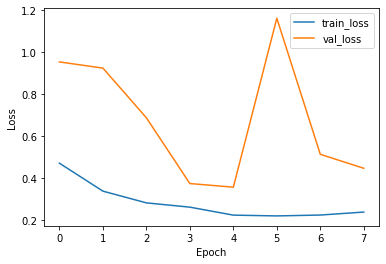

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.8410 - loss: 0.4219
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 223ms/step
Model Details:
Model: MobileNetV2 + Capsule Network + Dense
Epochs: 100
Test Accuracy: 0.8600000143051147
Test Loss: 0.3576187491416931
Validation Accuracy: 0.7850000262260437
Validation Loss: 0.44759753346443176
Precision: 0.9318181818181818
Recall: 0.7884615384615384
AUC-ROC: 0.8629807692307692
True Negatives: 90
False Positives: 6
False Negatives: 22
True Positives: 82
Error Rate: 0.13999998569488525
F1 Score: 0.8541666666666667
Cohen's Kappa: 0.7213375796178344
Matthews Correlation Coefficient: 0.7306603676997083
Balanced Accuracy: 0.8629807692307692
Time Taken (seconds): 238.5467882156372


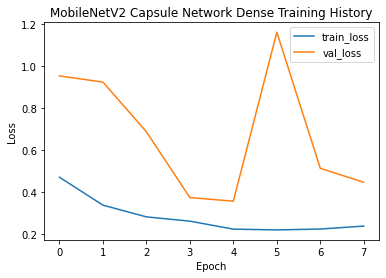

In [49]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Layer, GlobalAveragePooling2D, Reshape, Dense, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.models import Model
import cv2
import time
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_score, recall_score, f1_score, cohen_kappa_score, matthews_corrcoef, balanced_accuracy_score
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping

# Define Capsule Layer
class CapsuleLayer(Layer):
    def __init__(self, num_capsule, dim_capsule, routings=3, **kwargs):
        super(CapsuleLayer, self).__init__(**kwargs)
        self.num_capsule = num_capsule
        self.dim_capsule = dim_capsule
        self.routings = routings

    def build(self, input_shape):
        input_dim_capsule = input_shape[-1]
        self.W = self.add_weight(shape=[input_dim_capsule, self.num_capsule * self.dim_capsule],
                                 initializer='glorot_uniform',
                                 name='W')

    def call(self, u_vecs):
        u_hat_vecs = tf.reduce_sum(tf.expand_dims(u_vecs, -1) * tf.expand_dims(self.W, 0), axis=-2)
        b = tf.zeros(shape=[tf.shape(u_hat_vecs)[0], self.num_capsule])
        for i in range(self.routings):
            c = tf.nn.softmax(b, axis=1)
            s_j = tf.reduce_sum(tf.multiply(c[:, :, None], u_hat_vecs), axis=1)
            v_j = self.squash(s_j)
            if i < self.routings - 1:
                b += tf.reduce_sum(tf.multiply(v_j[:, None, :], u_hat_vecs), axis=-1)
        return v_j

    def squash(self, s_j):
        s_squared_norm = tf.reduce_sum(tf.square(s_j), axis=-1, keepdims=True)
        scale = s_squared_norm / (1 + s_squared_norm) / tf.sqrt(s_squared_norm + tf.keras.backend.epsilon())
        return scale * s_j

# Start time
start_time = time.time()

# Modify the data shapes based on the model requirements
X_train_resized = np.array([cv2.resize(img, (224, 224)) for img in X_train])
X_train_resized = np.expand_dims(X_train_resized, axis=-1)  # Add channel dimension
X_train_resized = np.repeat(X_train_resized, 3, axis=-1)  # Repeat the channel dimension to match the expected input shape of MobileNetV2

# Example: Assuming X_test is another dataset
X_test_resized = np.array([cv2.resize(img, (224, 224)) for img in X_test])
X_test_resized = np.expand_dims(X_test_resized, axis=-1)
X_test_resized = np.repeat(X_test_resized, 3, axis=-1)

# Load MobileNetV2 model
base_model = tf.keras.applications.MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Define the custom architecture
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Reshape((-1, 128))(x)  # Reshape to 3D tensor for Capsule Network
capsule = CapsuleLayer(num_capsule=10, dim_capsule=16, routings=3)(x)  # Example: 10 capsules with dimension 16
capsule = Flatten()(capsule)  # Flatten the output
output = Dense(1, activation='sigmoid')(capsule)  # Use a single output unit for binary classification

# Create the full model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model with Adam optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display model summary
model.summary()

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1, restore_best_weights=True)

# Train the model with early stopping and 20 epochs
history = model.fit(X_train_resized, y_train, epochs=100, validation_data=(X_test_resized, y_test), callbacks=[early_stopping])

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)

# Confusion matrix
test_predictions = (model.predict(X_test_resized) > 0.5).astype(int)
conf_matrix = confusion_matrix(y_test, test_predictions)

# ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, test_predictions)
roc_auc = roc_auc_score(y_test, test_predictions)

# Calculate Precision, Recall, F1 Score, Cohen's Kappa
precision = precision_score(y_test, test_predictions)
recall = recall_score(y_test, test_predictions)
f1 = f1_score(y_test, test_predictions)
kappa = cohen_kappa_score(y_test, test_predictions)
mcc = matthews_corrcoef(y_test, test_predictions)
balanced_acc = balanced_accuracy_score(y_test, test_predictions)

# End time
end_time = time.time()

# Define model details
model_details = {
    'Model': 'MobileNetV2 + Capsule Network + Dense',
    'Epochs': 100,
    'Test Accuracy': test_accuracy,
    'Test Loss': test_loss,
    'Validation Accuracy': history.history['val_accuracy'][-1],
    'Validation Loss': history.history['val_loss'][-1],
    'Precision': precision,
    'Recall': recall,
    'AUC-ROC': roc_auc,
    'True Negatives': conf_matrix[0][0],
    'False Positives': conf_matrix[0][1],
    'False Negatives': conf_matrix[1][0],
    'True Positives': conf_matrix[1][1],
    'Error Rate': 1 - test_accuracy,
    'F1 Score': f1,
    "Cohen's Kappa": kappa,
    'Matthews Correlation Coefficient': mcc,
    'Balanced Accuracy': balanced_acc,
    'Time Taken (seconds)': end_time - start_time
}

# Print model details
print("Model Details:")
for key, value in model_details.items():
    print(f"{key}: {value}")

# Save model details to a CSV file
import pandas as pd
df = pd.DataFrame(model_details, index=[0])
df.to_csv("MobileNetV2_Model8(100).csv", index=False)

# Plot training history
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title("MobileNetV2 Capsule Network Dense Training History")
plt.show()

